<a href="https://colab.research.google.com/github/Tomawock/MLDM_COVID-19/blob/master/datasets/Analisi_province_meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creazione del dataSet Meteo

Unione dei dataset sensori meteo e i dati legati ad esso

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob
os.chdir('/content/drive/Shared drives/MLDM progetto/Datasets')

In [3]:
#Carica dati dai file
stazioni_meteo = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/dataset_originali/Stazioni_Meteorologiche.csv") 
dati_stazioni = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/dataset_originali/Dati_sensori_meteo_4_8_2020.csv") 

In [4]:
stazioni_con_dati = stazioni_meteo.merge(dati_stazioni, on='IdSensore')
stazioni_con_dati.head(3)

IdSensore         Tipologia Unità DiMisura  ...  Valore Stato  idOperatore
0      22006  Umidità Relativa              %  ...    32.0    VA            1
1      22006  Umidità Relativa              %  ...    32.0    VA            1
2      22006  Umidità Relativa              %  ...    32.0    VA            1

[3 rows x 21 columns]

In [5]:
variazione_righe=[]
variazione_righe.append(stazioni_con_dati.shape[0])
print(variazione_righe)
print(stazioni_con_dati.dtypes)


[35665990]
IdSensore                                                           int64
Tipologia                                                          object
Unità DiMisura                                                     object
IdStazione                                                          int64
NomeStazione                                                       object
Quota                                                               int64
Provincia                                                          object
DataStart                                                          object
DataStop                                                           object
Storico                                                            object
UTM_Nord                                                            int64
UTM_Est                                                             int64
lng                                                               float64
lat                        

In [6]:
del stazioni_con_dati['Unità\xa0DiMisura']
#del stazioni_con_dati['Provincia']
del stazioni_con_dati['IdStazione']
del stazioni_con_dati['NomeStazione']
del stazioni_con_dati['Quota']
del stazioni_con_dati['DataStart']
del stazioni_con_dati['DataStop']
del stazioni_con_dati['Storico']
del stazioni_con_dati['UTM_Nord']
del stazioni_con_dati['UTM_Est']
del stazioni_con_dati['lng']
del stazioni_con_dati['lat']
del stazioni_con_dati['location']
del stazioni_con_dati['Limiti amministrativi 2014 delle province di Regione Lombardia']
del stazioni_con_dati['Limiti amministrativi 2015 delle province di Regione Lombardia']
del stazioni_con_dati['Stato']
del stazioni_con_dati['IdSensore']

In [7]:
#elimina le righe con valore mancante -9999
stazioni_con_dati_mod=0
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != -9999]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [8]:
#elimina le righe con direzione vento variabile  888,8888 
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != 888.8888]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [9]:
 #elimina le righe con direzione vento calmo  777, 7777
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.Valore != 777.7777]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [10]:
#elimno le righe che non hanno id uguale a 1
stazioni_con_dati_mod = stazioni_con_dati[stazioni_con_dati.idOperatore !=3]
variazione_righe.append(stazioni_con_dati_mod.shape[0])

In [11]:
print(variazione_righe)

[35665990, 35665990, 35665990, 35665990, 29876714]


In [12]:
del stazioni_con_dati_mod['idOperatore']

In [13]:
stazioni_con_dati_mod.head(3)

Tipologia Provincia                 Data  Valore
0  Umidità Relativa        BS  01/01/2020 00:10:00    32.0
1  Umidità Relativa        BS  01/01/2020 00:20:00    32.0
2  Umidità Relativa        BS  01/01/2020 00:30:00    32.0

In [14]:
stazioni_con_dati_mod.to_csv("meteo_merged.csv", index=False)

FASE 2 di modifca ma prima esposrto tuytto in un file csv se nio ci si mette la vita 

In [15]:
#Carica dati dai file
stazioni_con_dati_mod = pd.read_csv("/content/drive/Shared drives/MLDM progetto/Datasets/meteo_merged.csv") 

In [16]:
variazione_righe=[]
variazione_righe.append(stazioni_con_dati_mod.shape[0])
stazioni_con_dati_mod.head(3)

Tipologia Provincia                 Data  Valore
0  Umidità Relativa        BS  01/01/2020 00:10:00    32.0
1  Umidità Relativa        BS  01/01/2020 00:20:00    32.0
2  Umidità Relativa        BS  01/01/2020 00:30:00    32.0

In [17]:
stazioni_con_dati_mod['Data'] = pd.to_datetime(stazioni_con_dati_mod['Data'], format='%d/%m/%Y %H:%M:%S')

In [18]:
#normalizza per avere ancoa la data con datetime e non object
stazioni_con_dati_mod['Data'] =stazioni_con_dati_mod['Data'].dt.normalize()

In [19]:
variazione_righe.append(stazioni_con_dati_mod.shape[0])
print(variazione_righe)

[29876714, 29876714]


In [42]:
stazioni_con_dati_media_giornaliera=stazioni_con_dati_mod.groupby(['Provincia','Tipologia','Data'])['Valore'].mean().reset_index()
print(stazioni_con_dati_media_giornaliera.head(5))
stazioni_con_dati_media_giornaliera.shape

  Provincia            Tipologia       Data      Valore
0        AL  Livello Idrometrico 2020-01-01  135.326389
1        AL  Livello Idrometrico 2020-01-02  129.979167
2        AL  Livello Idrometrico 2020-01-03  125.916667
3        AL  Livello Idrometrico 2020-01-04  121.909722
4        AL  Livello Idrometrico 2020-01-05  117.423611


In [47]:
prov=[]
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'BG'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'BS'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'CO'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'CR'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'LC'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'LO'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'MN'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'MI'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'MB'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'PV'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'SO'])
prov.append(stazioni_con_dati_media_giornaliera.loc[stazioni_con_dati_media_giornaliera['Provincia']== 'VA'])

print(prov[0])

     Provincia       Tipologia       Data      Valore
214         BG    Altezza Neve 2020-01-01  114.751389
215         BG    Altezza Neve 2020-01-02  114.406439
216         BG    Altezza Neve 2020-01-03  114.355051
217         BG    Altezza Neve 2020-01-04  113.281392
218         BG    Altezza Neve 2020-01-05  112.558586
...        ...             ...        ...         ...
1921        BG  Velocità Vento 2020-07-28    1.664453
1922        BG  Velocità Vento 2020-07-29    1.544296
1923        BG  Velocità Vento 2020-07-30    1.614143
1924        BG  Velocità Vento 2020-07-31    1.718054
1925        BG  Velocità Vento 2020-08-01    1.665049

[1712 rows x 4 columns]


Grafici dei dati delle province rilevati dalle varie province

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too

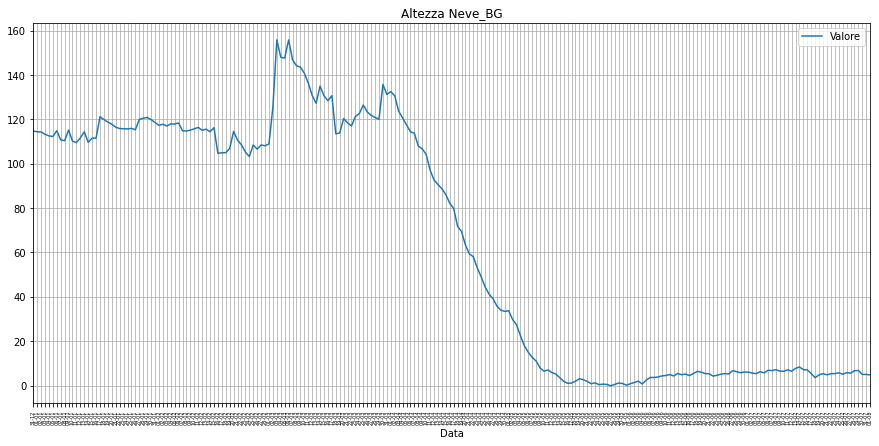

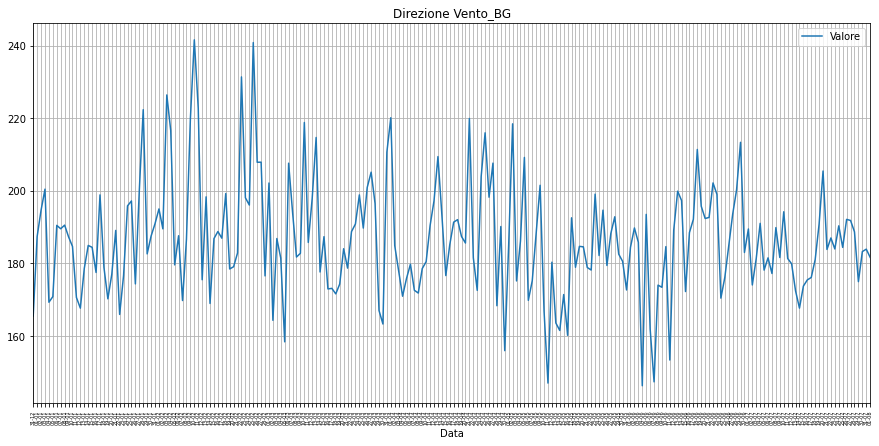

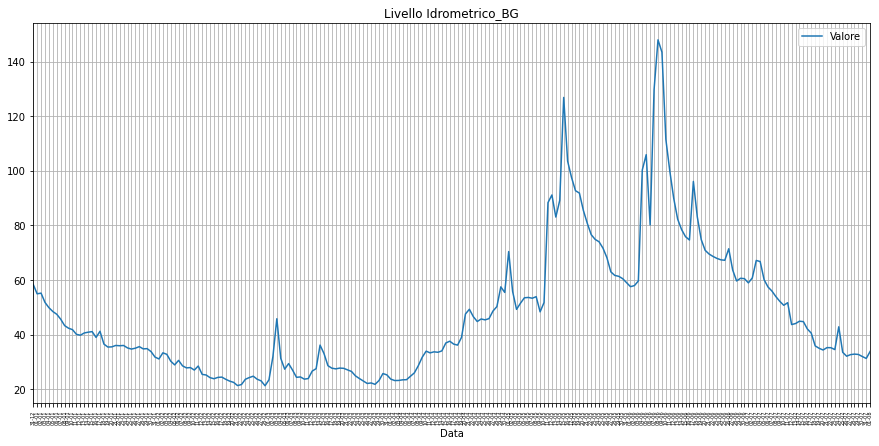

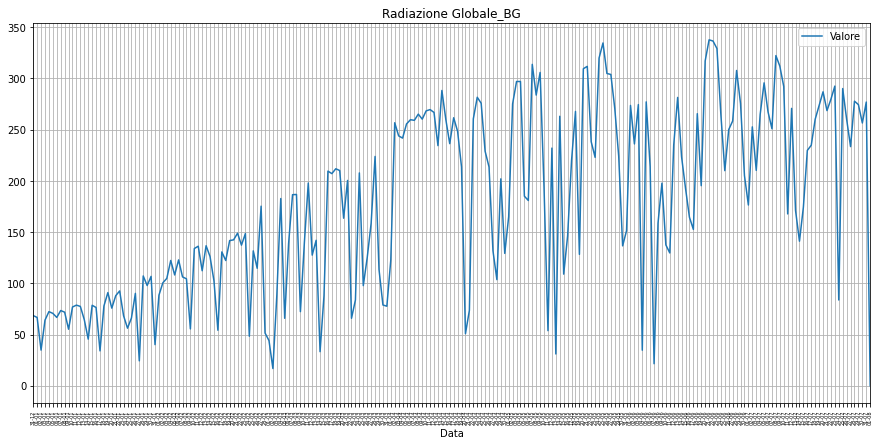

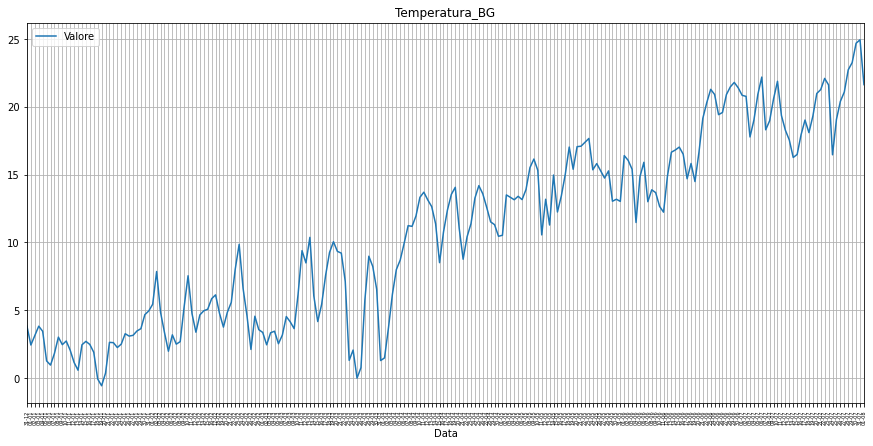

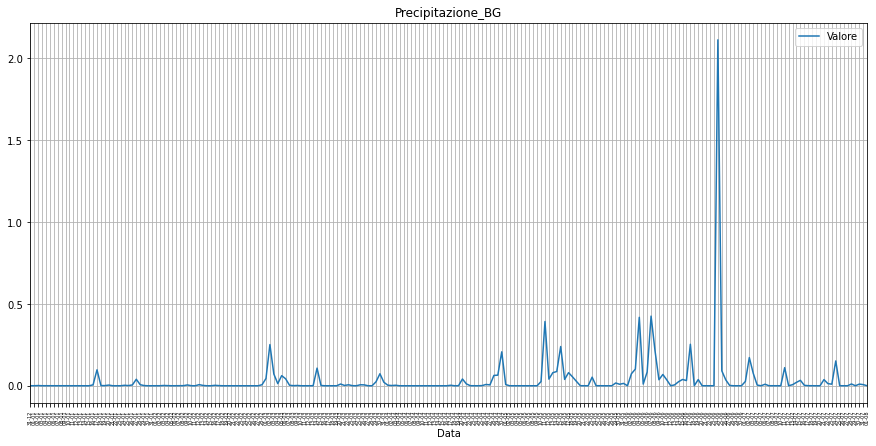

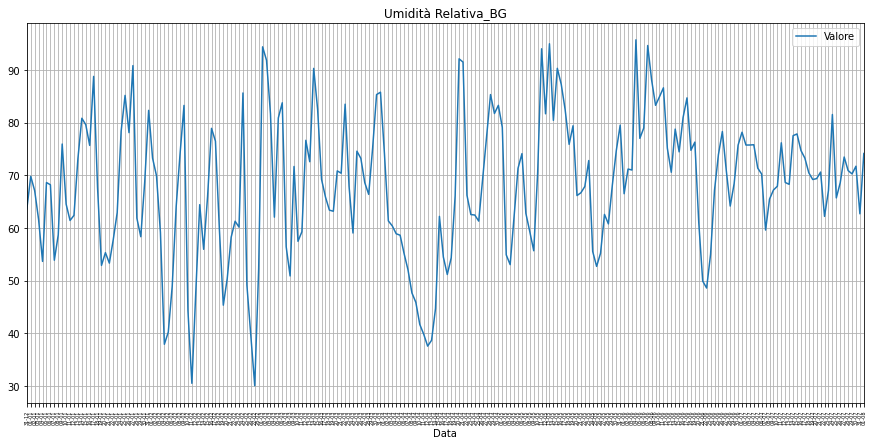

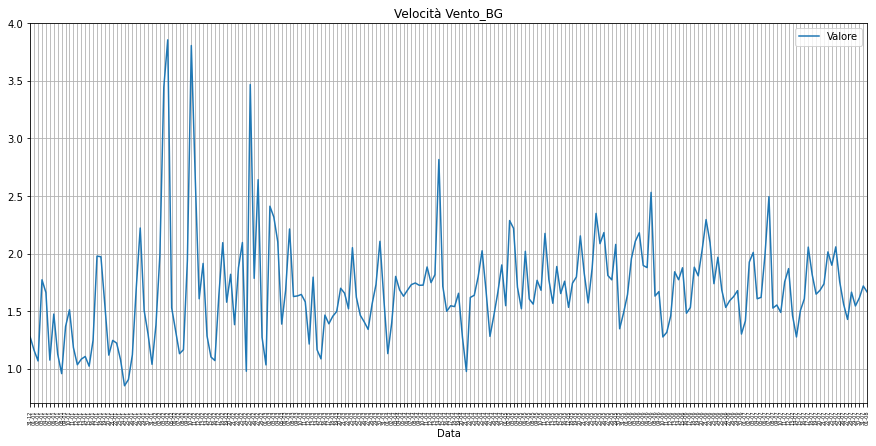

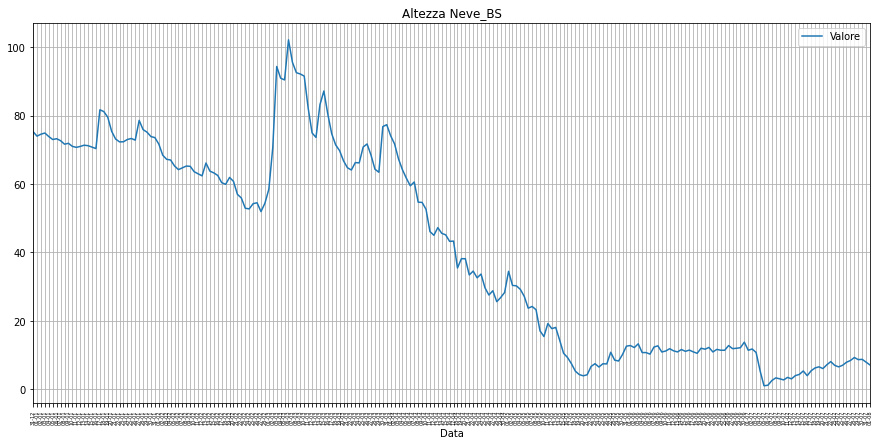

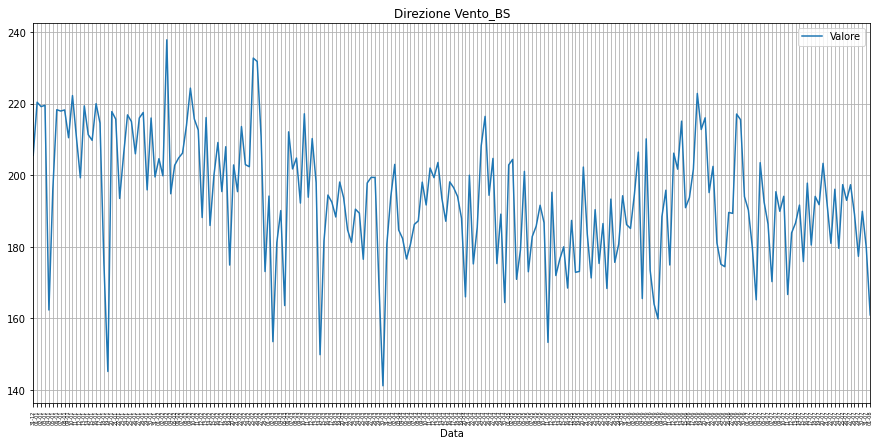

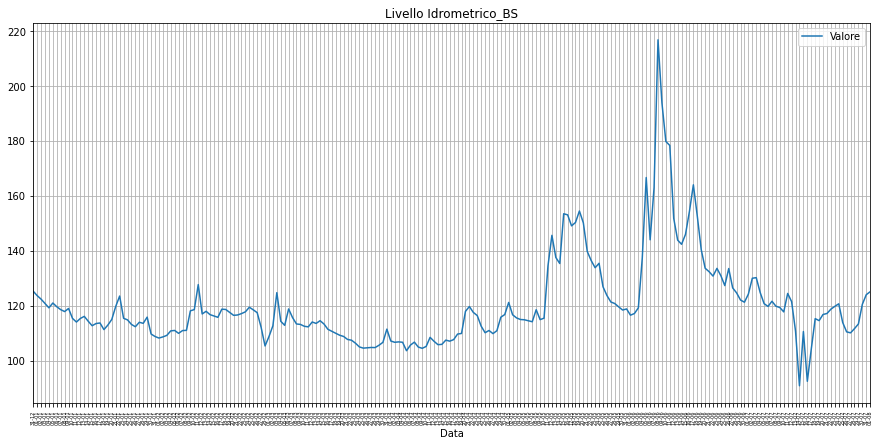

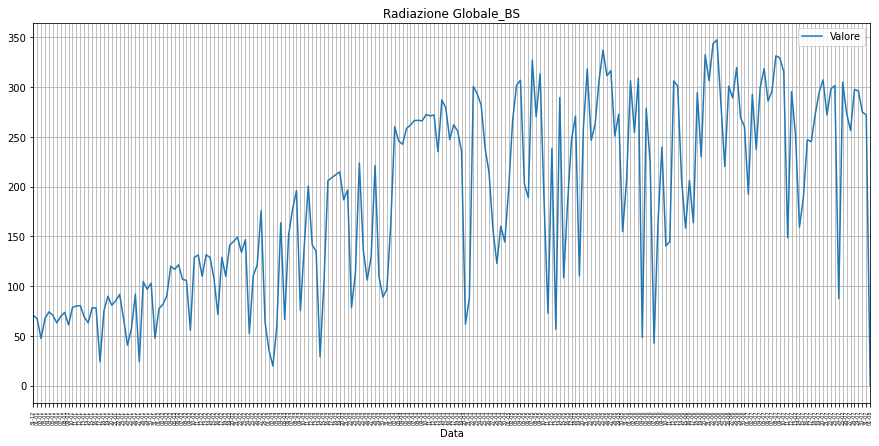

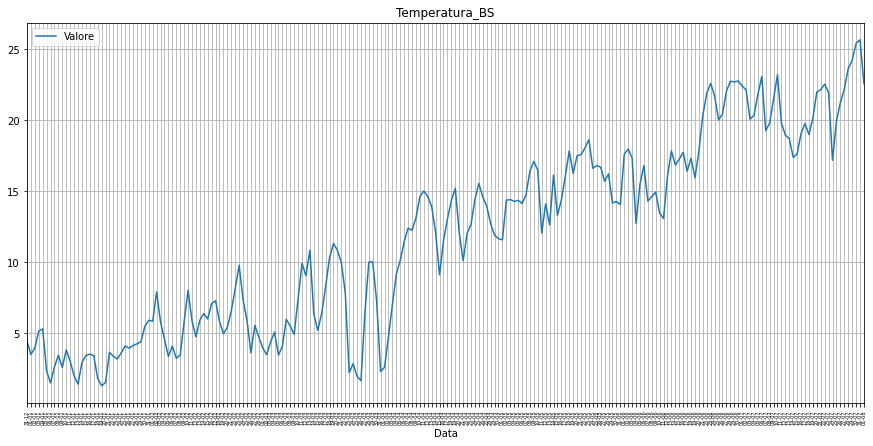

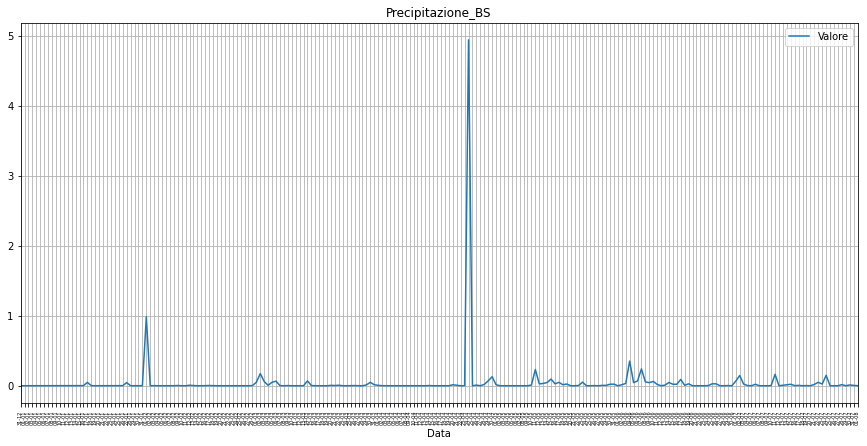

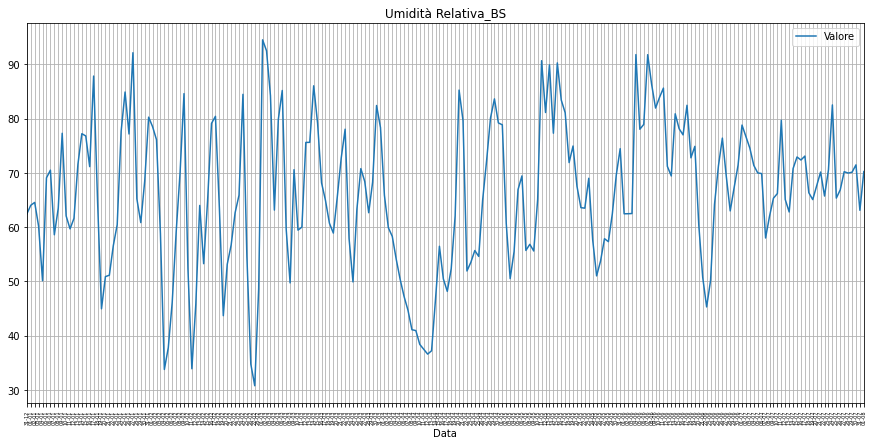

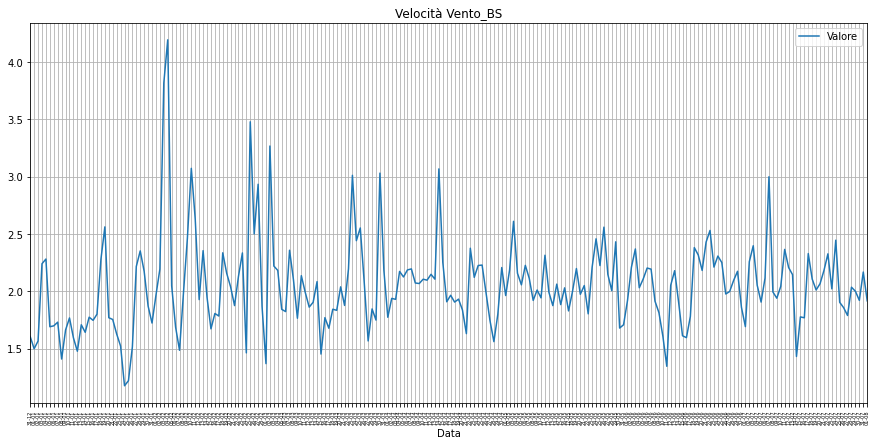

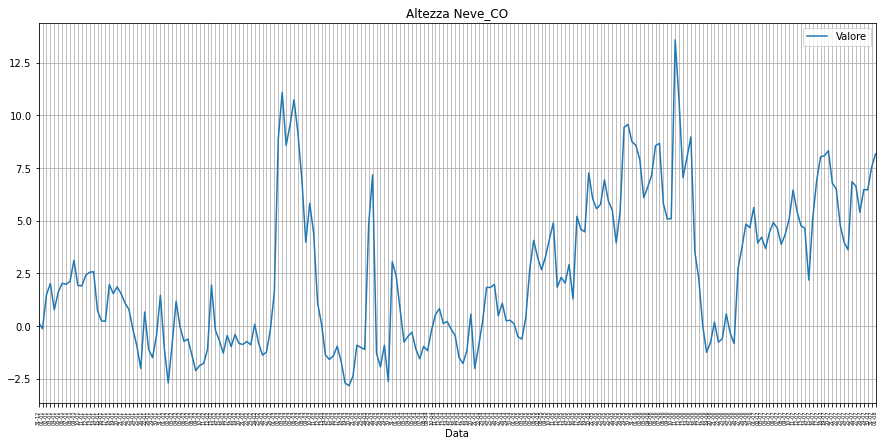

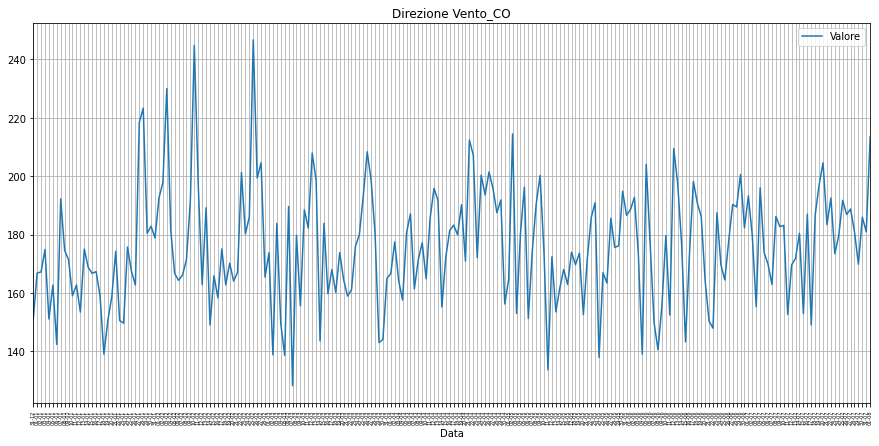

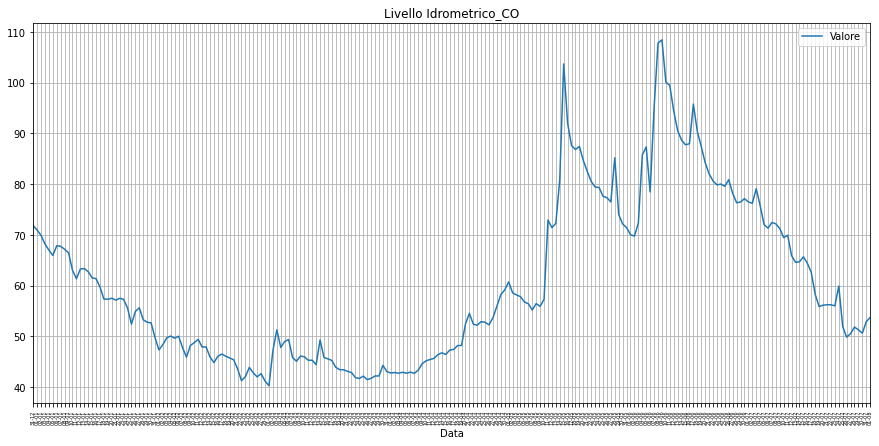

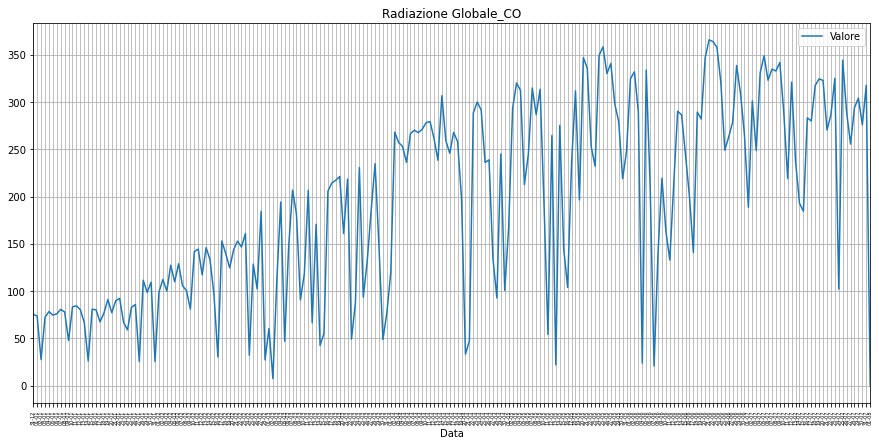

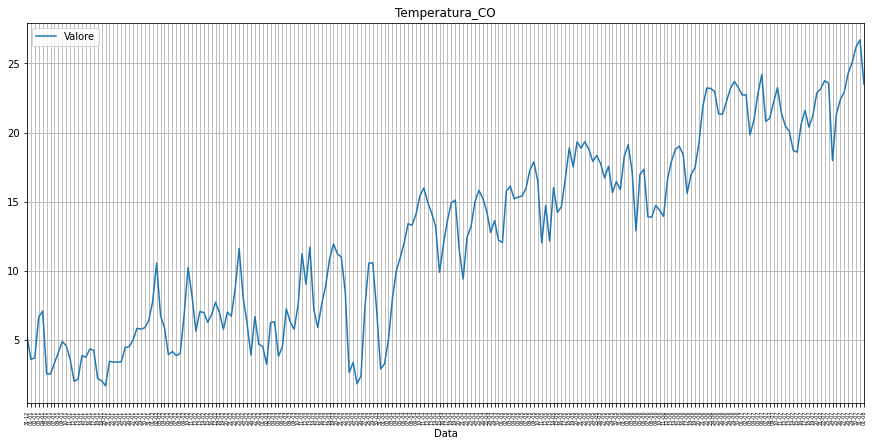

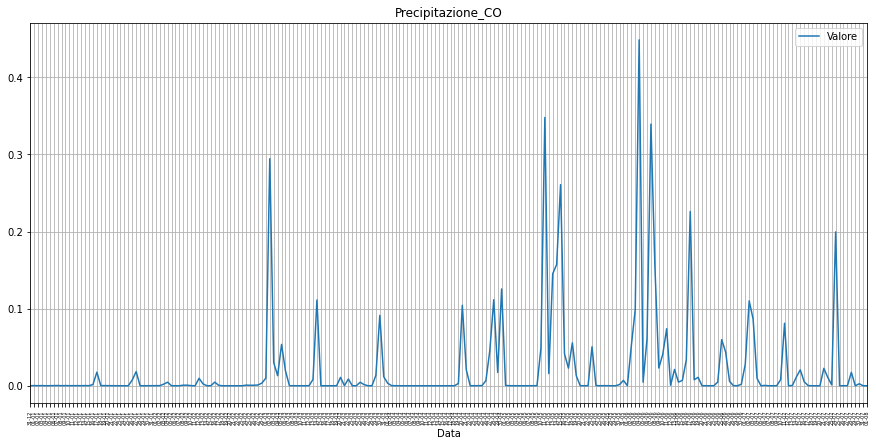

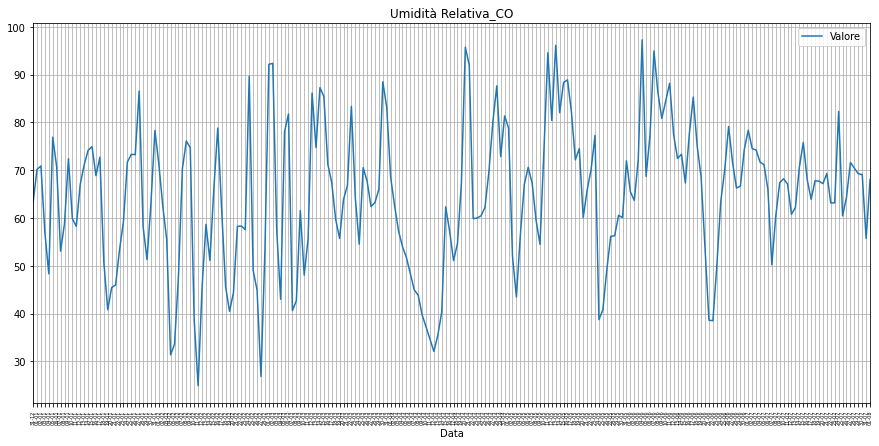

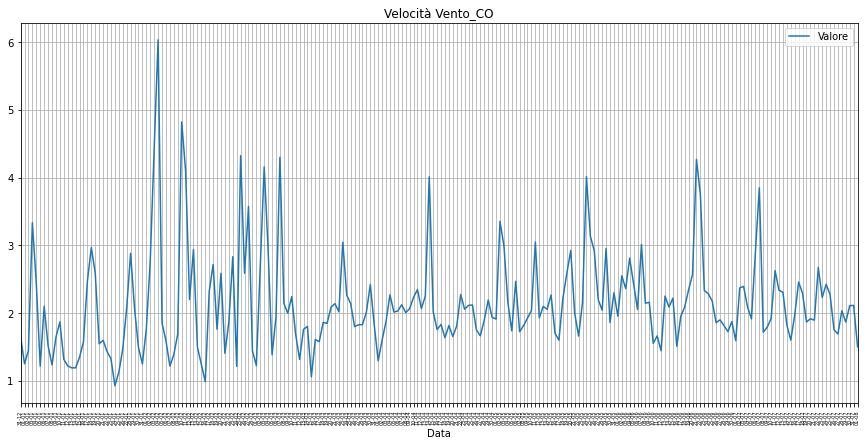

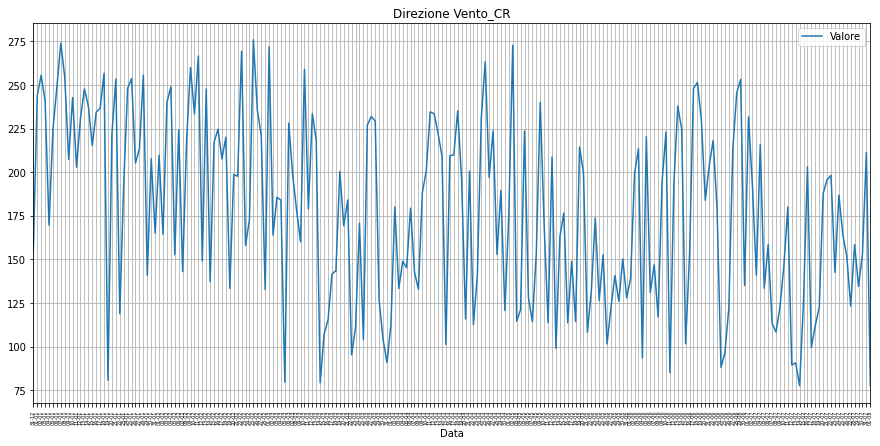

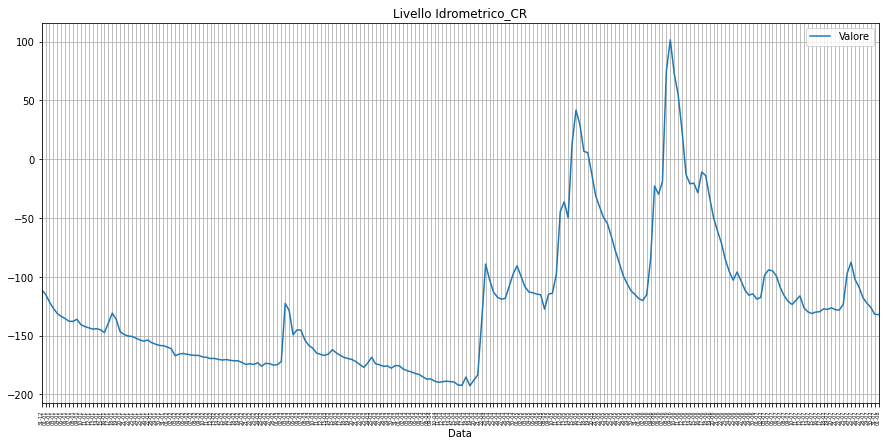

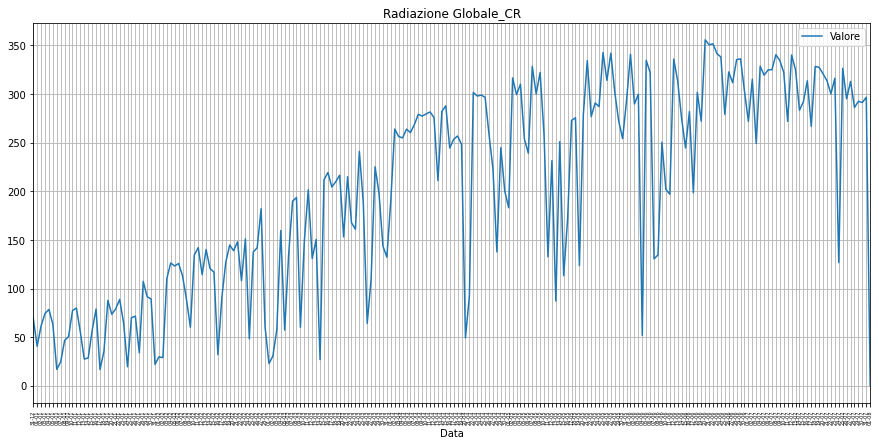

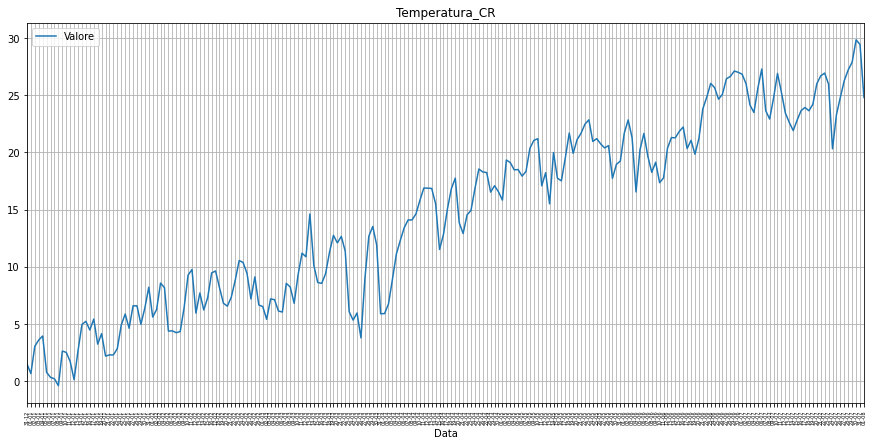

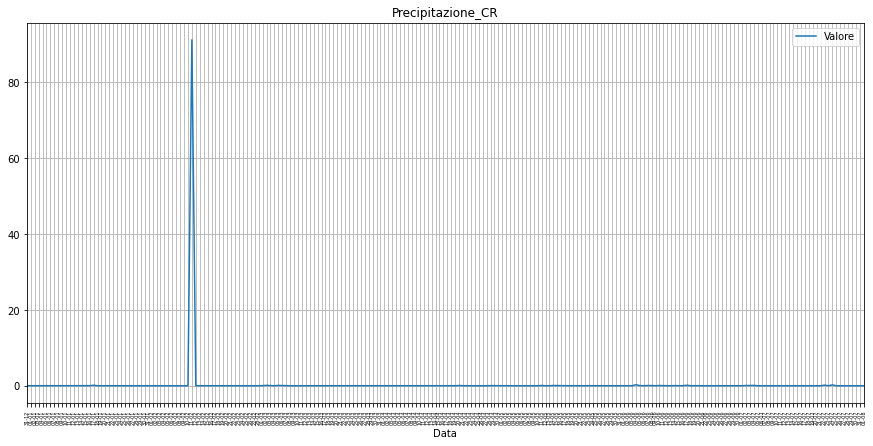

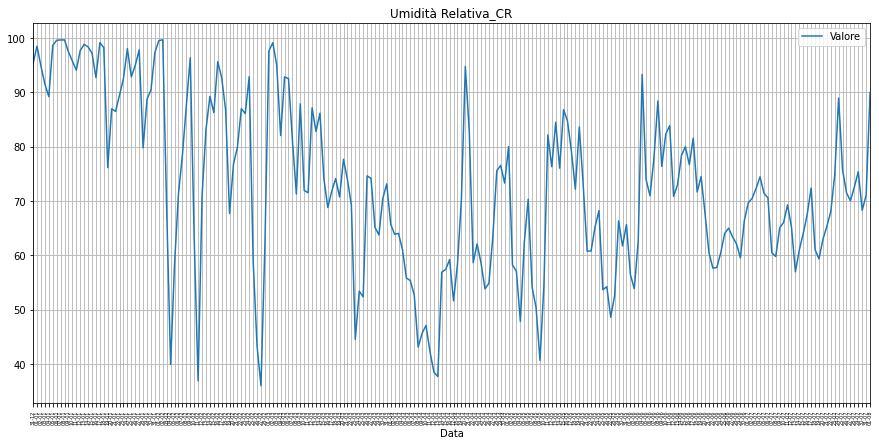

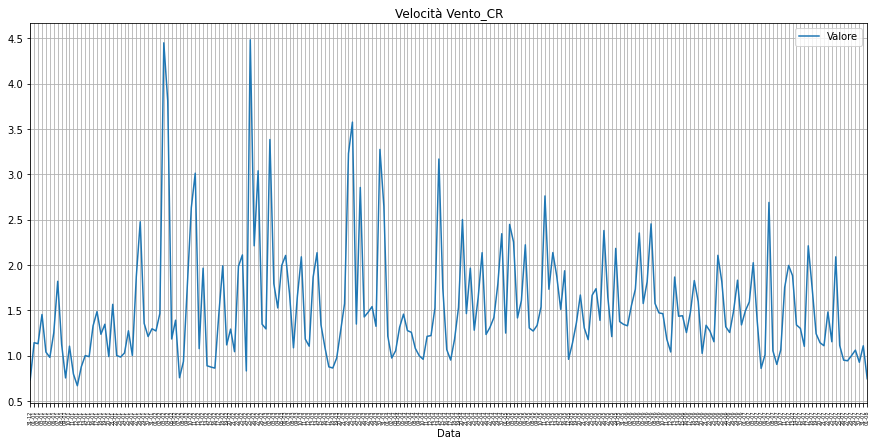

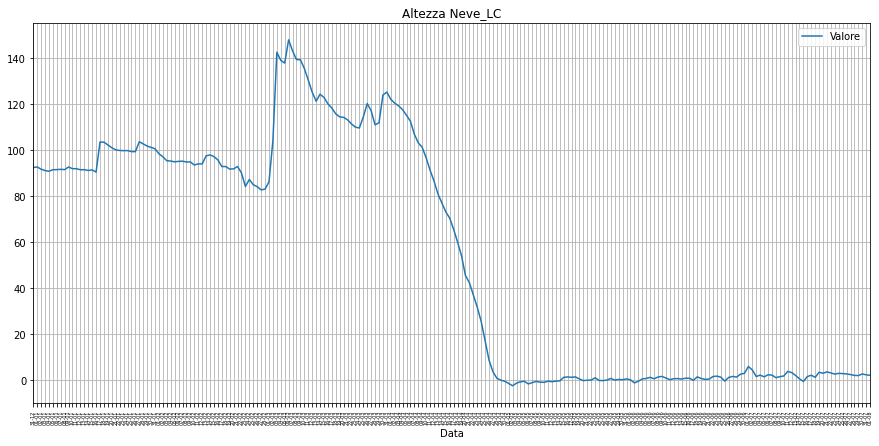

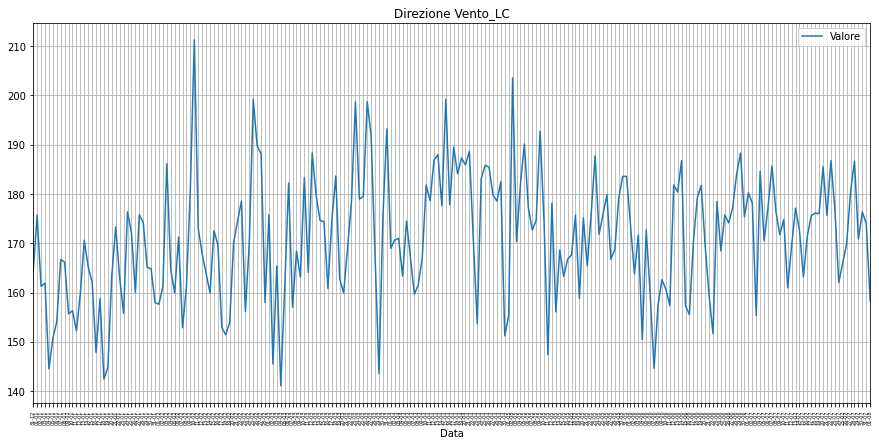

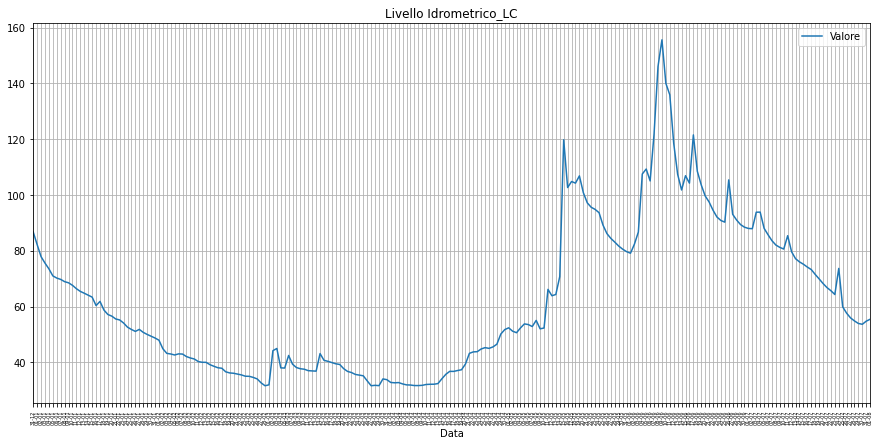

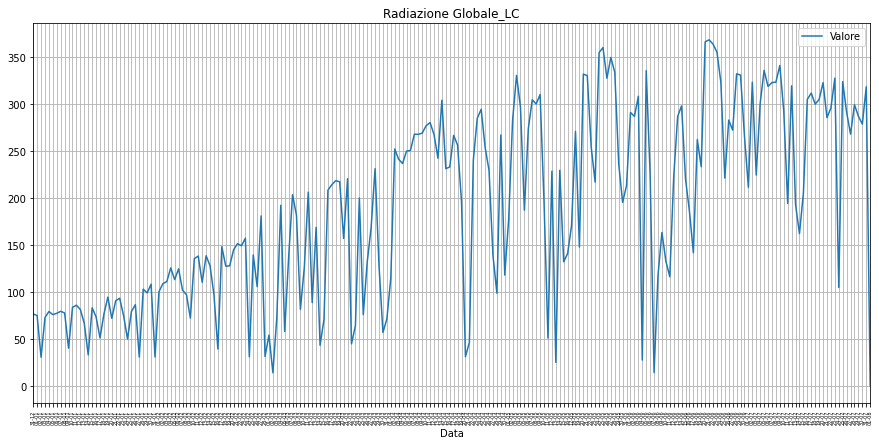

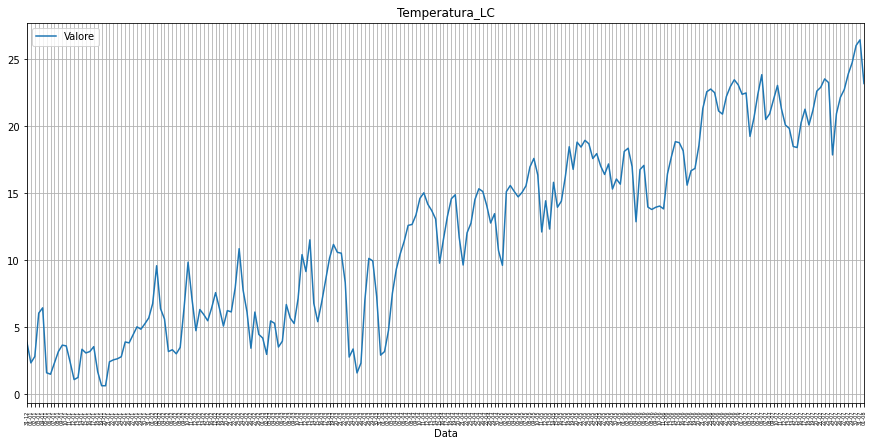

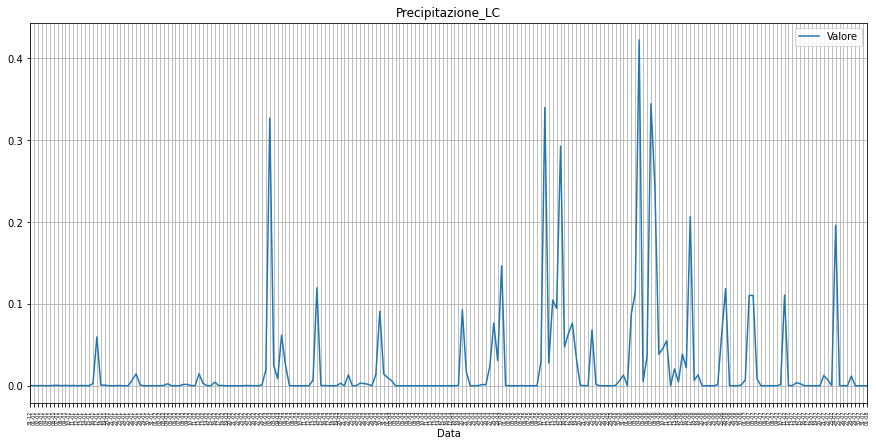

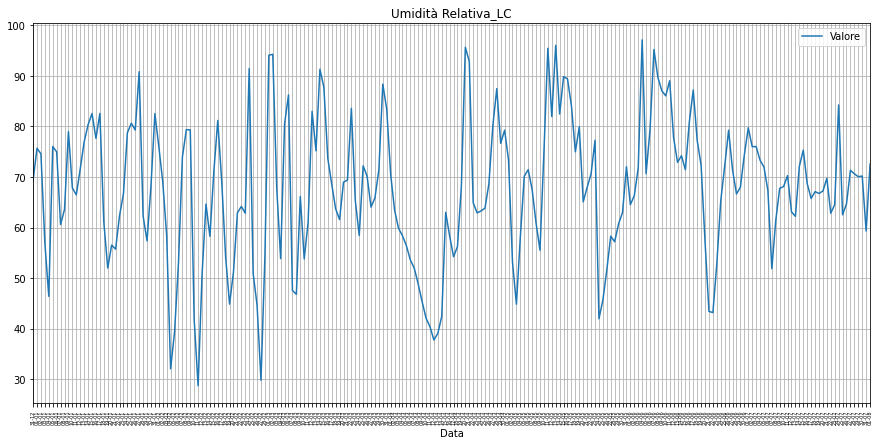

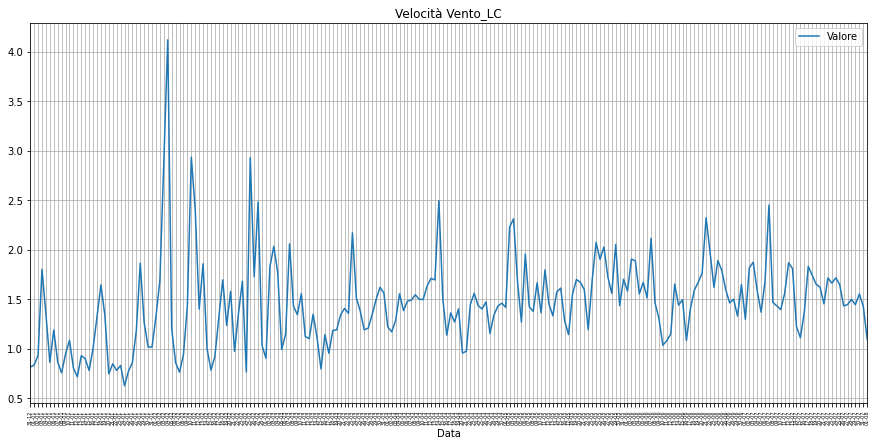

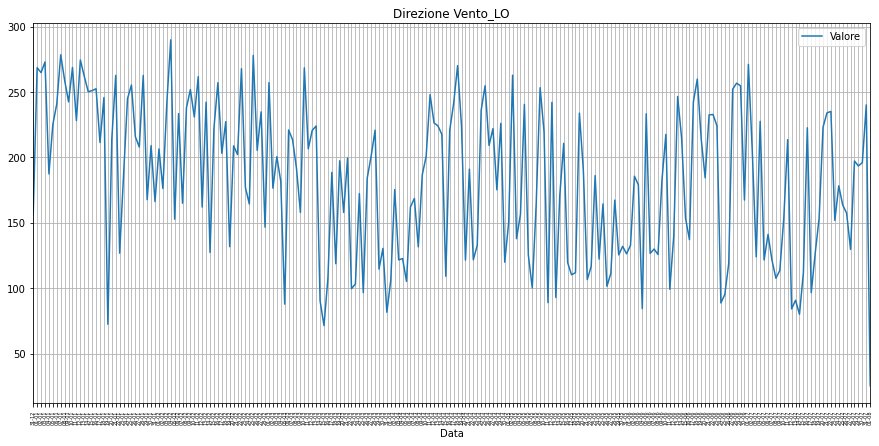

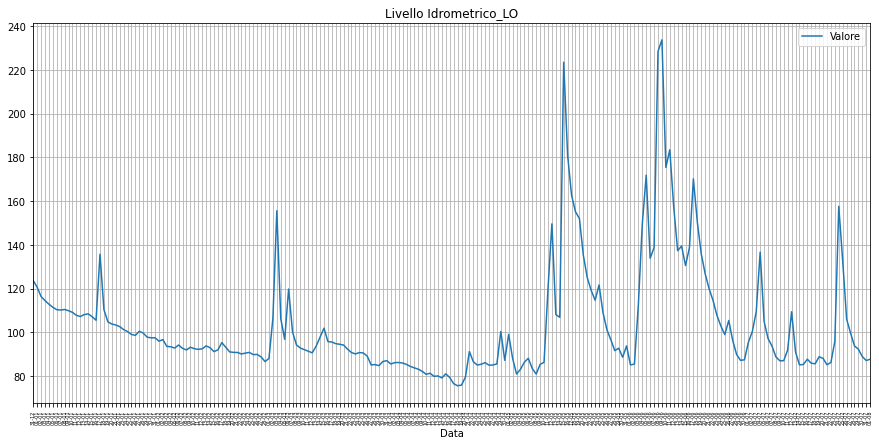

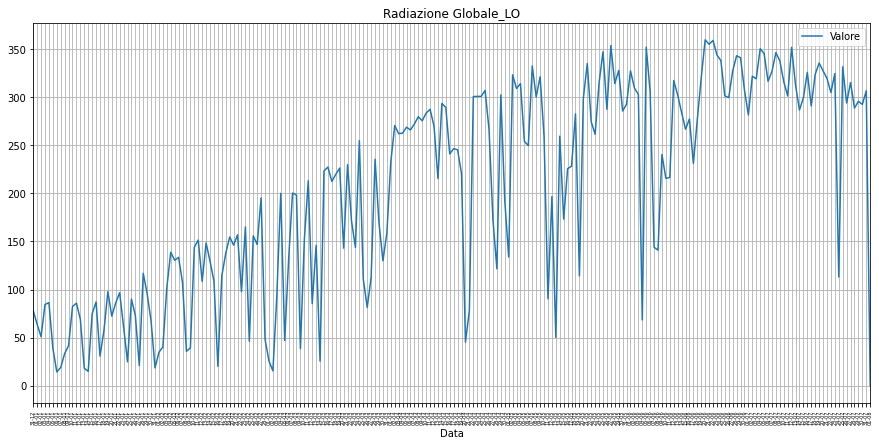

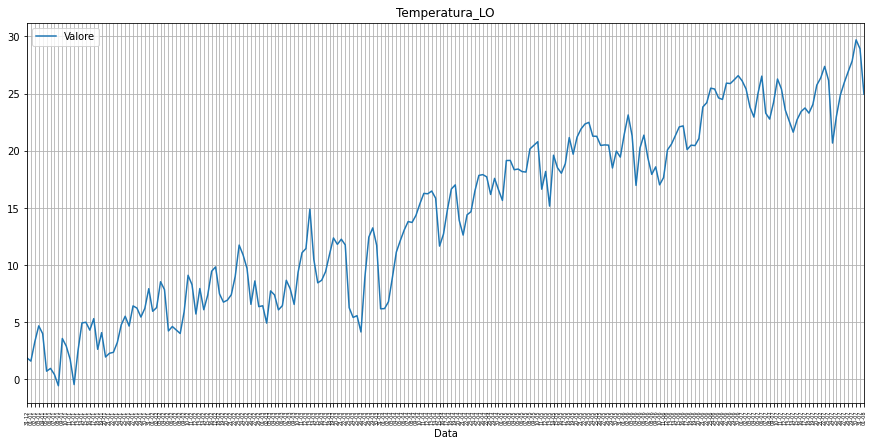

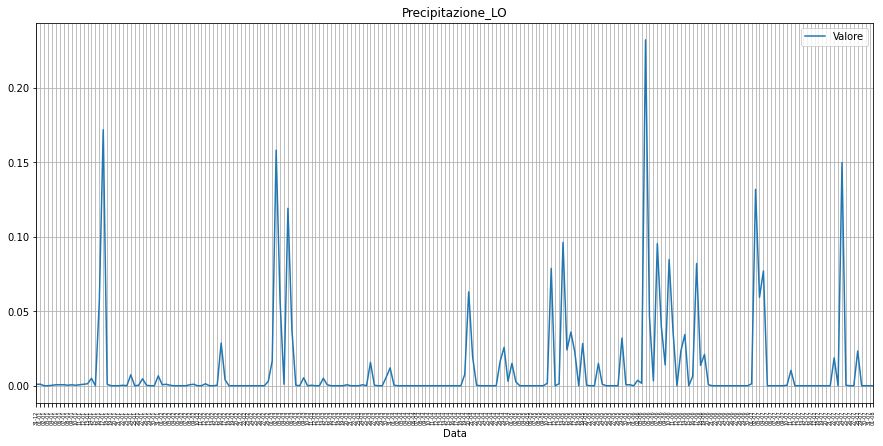

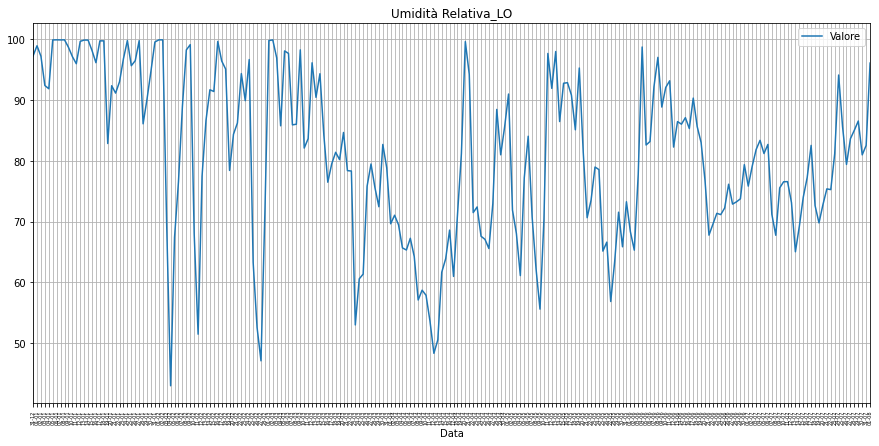

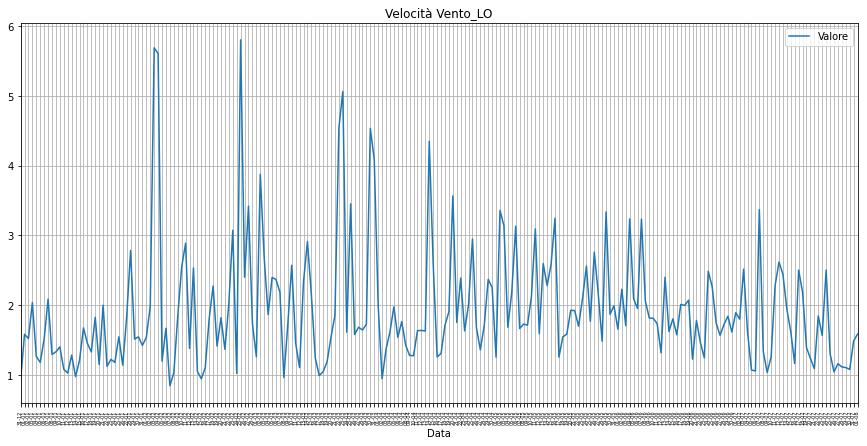

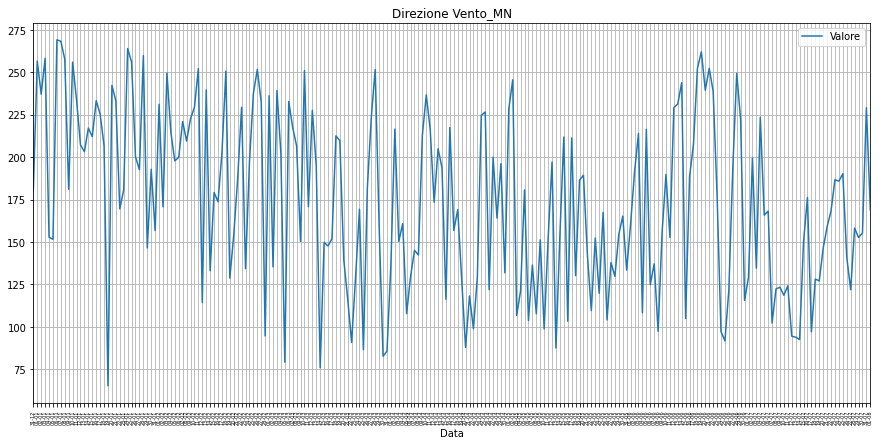

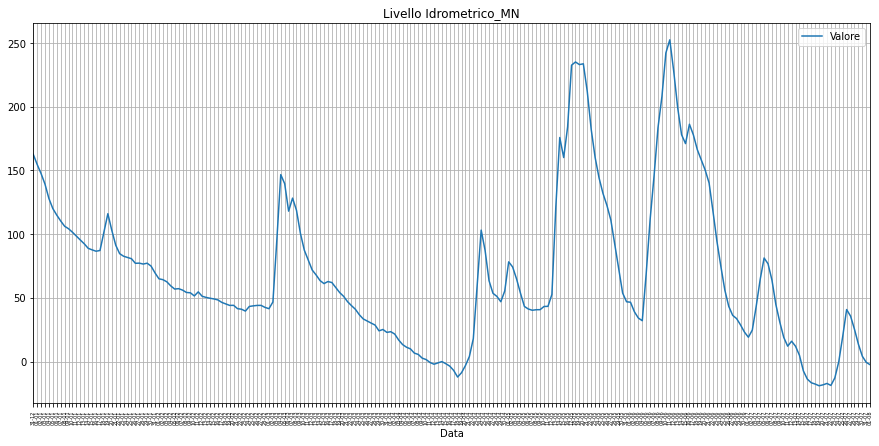

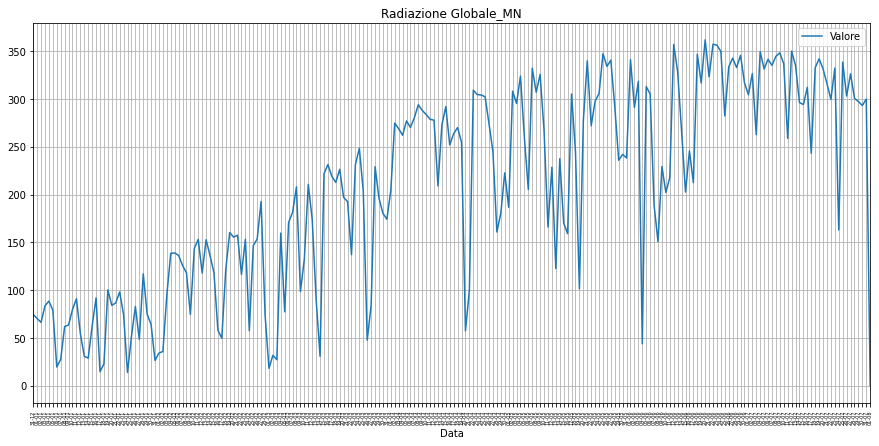

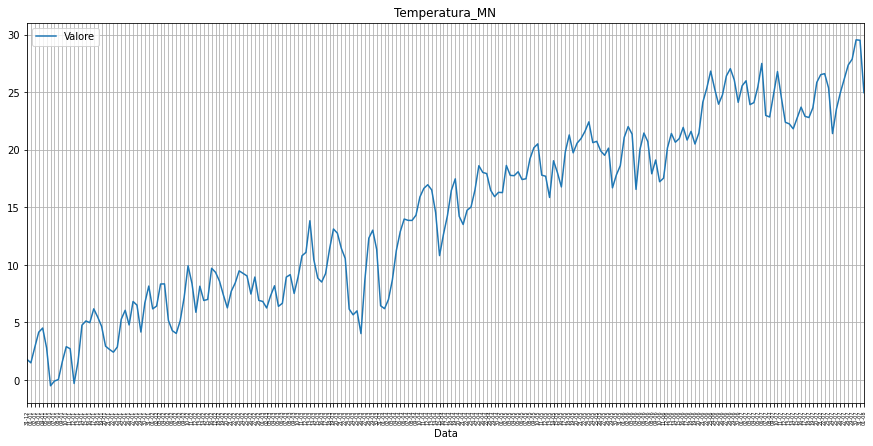

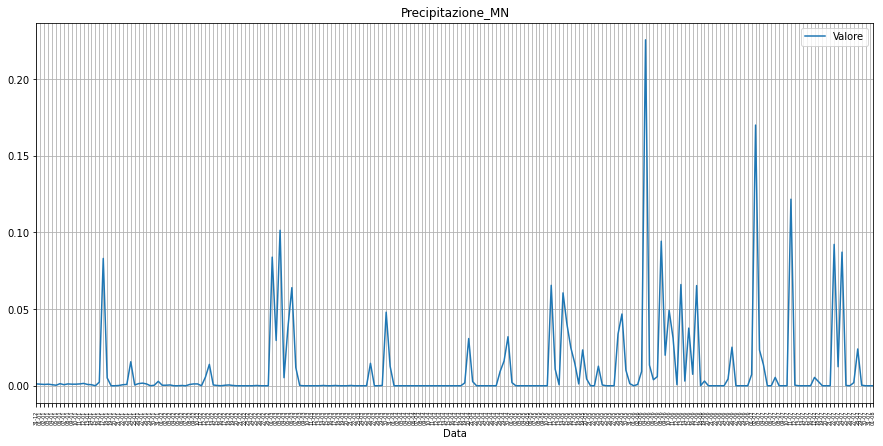

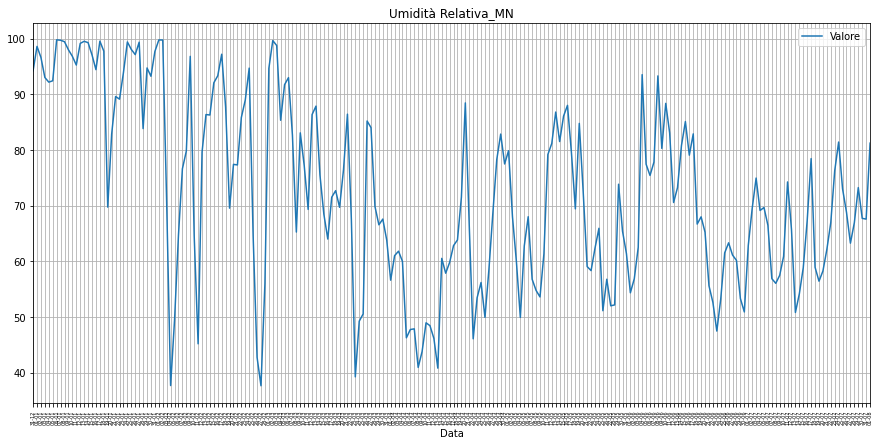

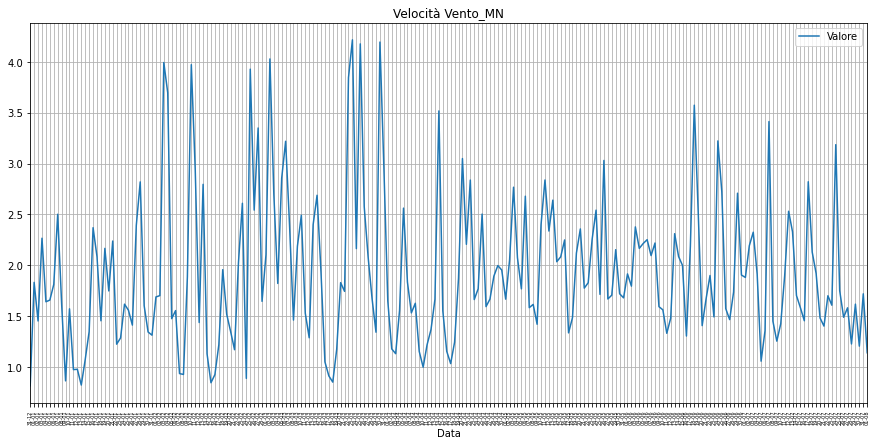

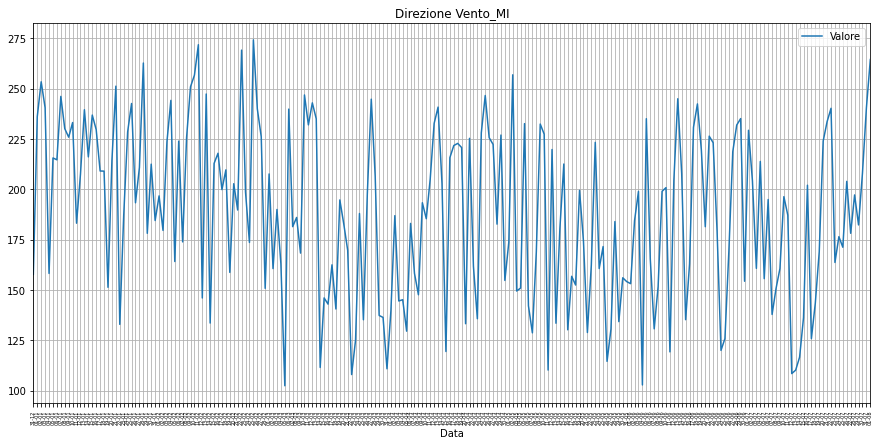

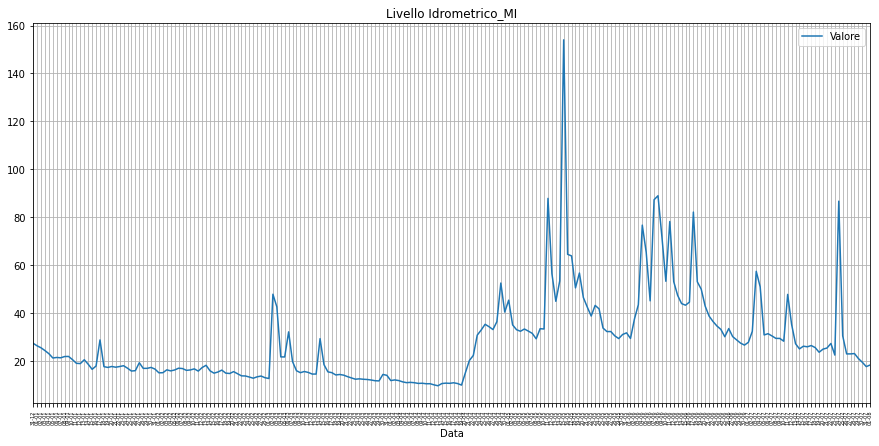

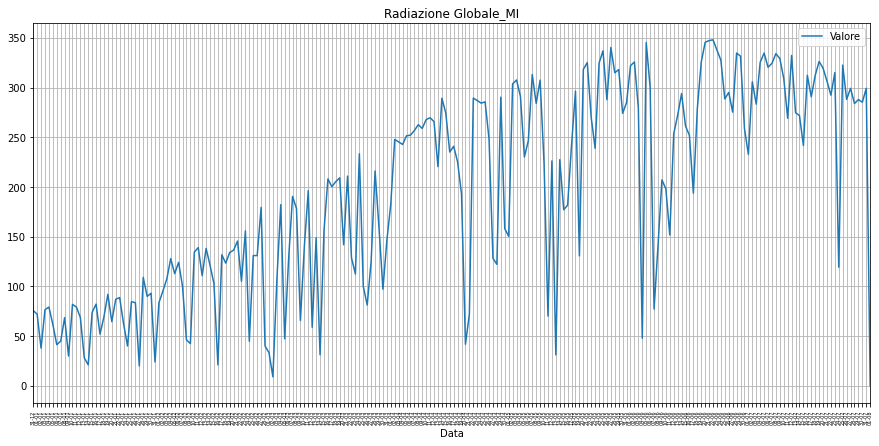

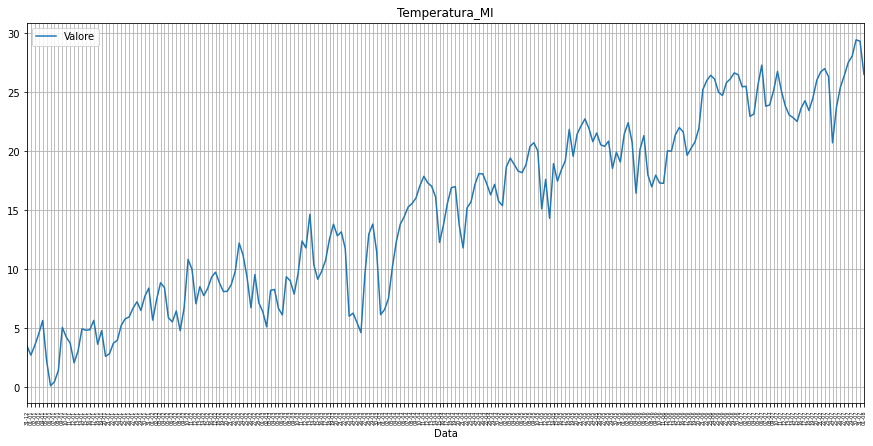

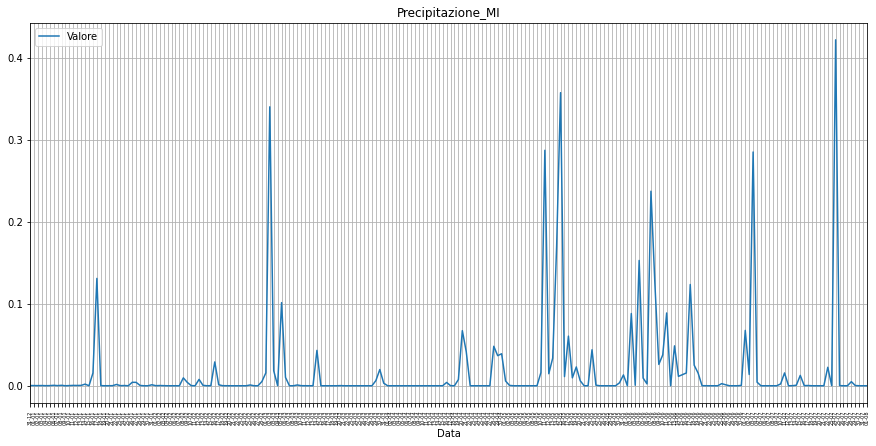

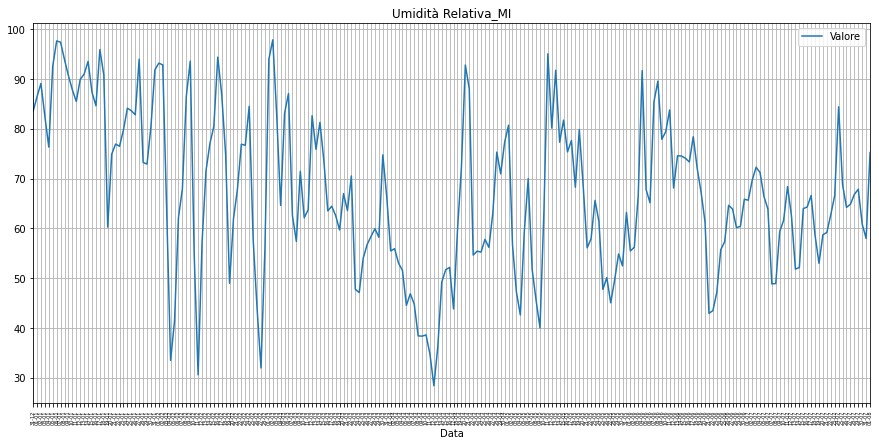

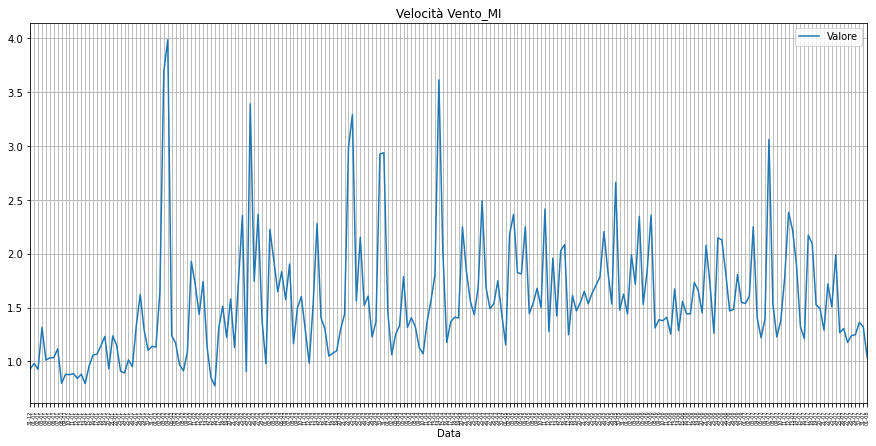

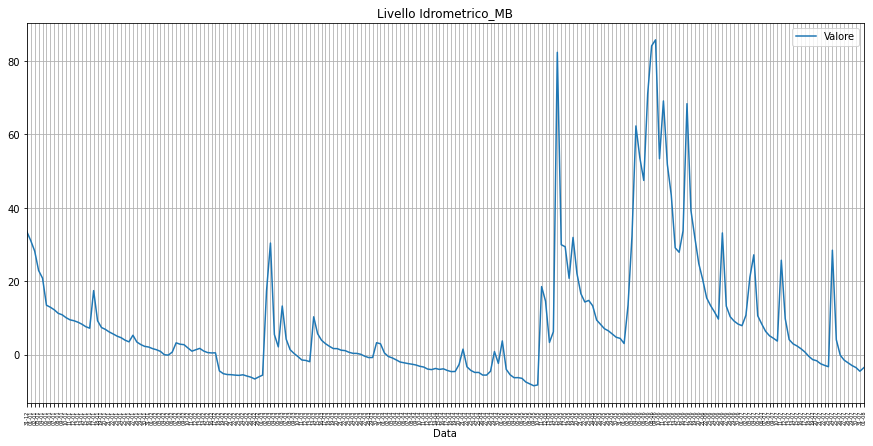

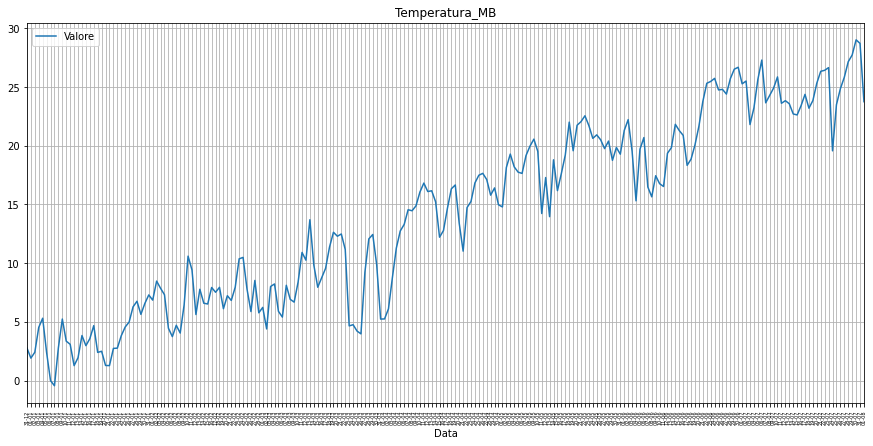

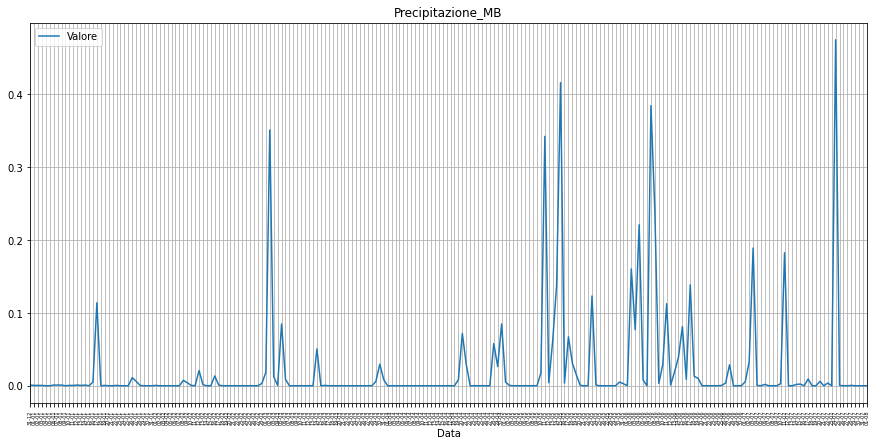

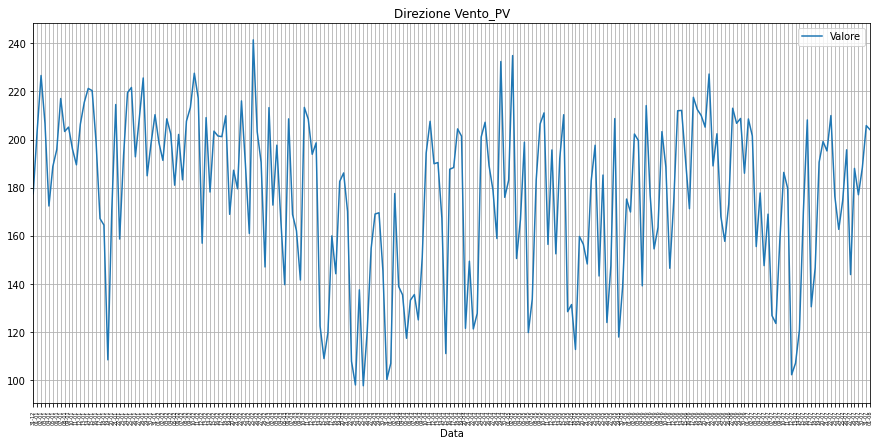

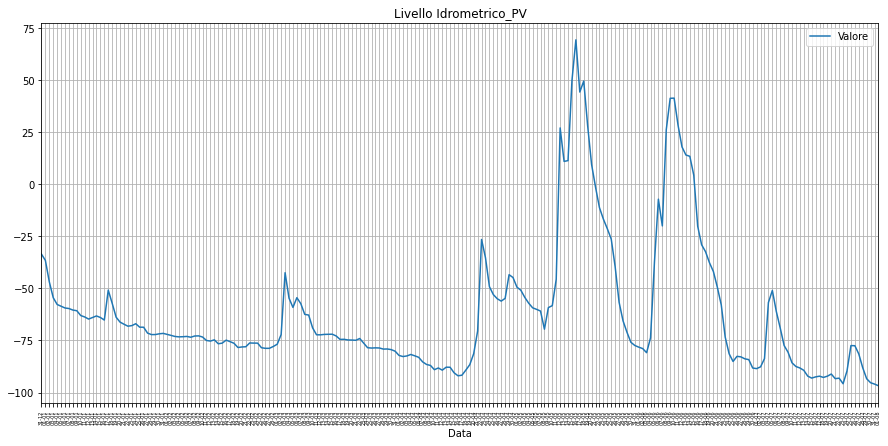

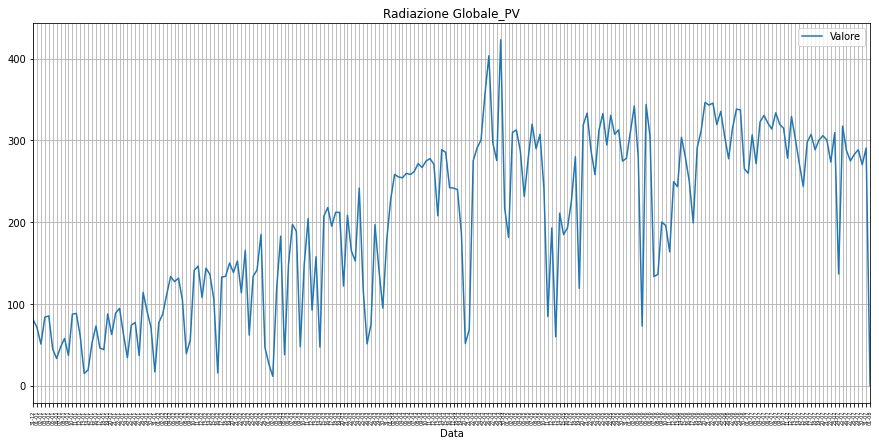

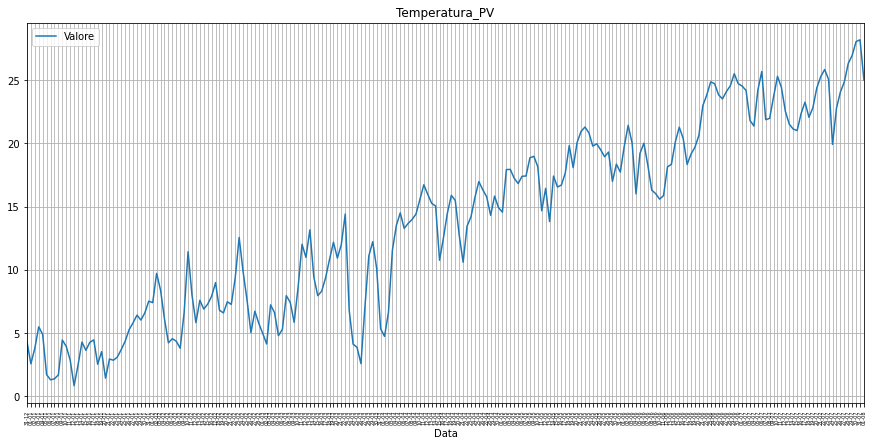

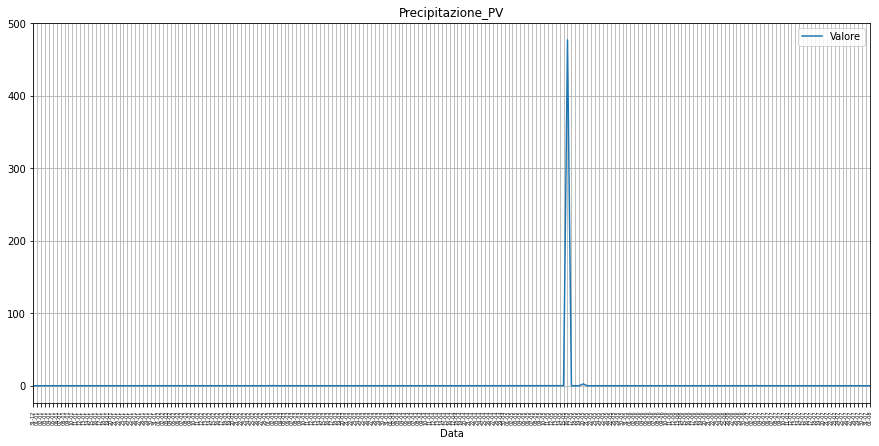

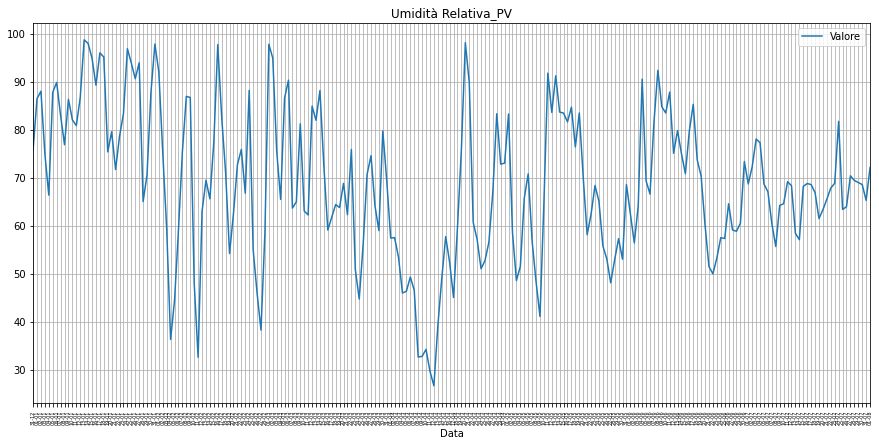

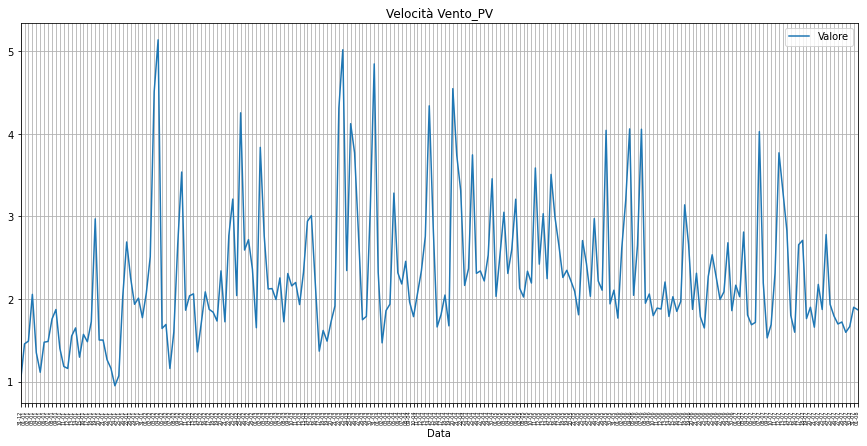

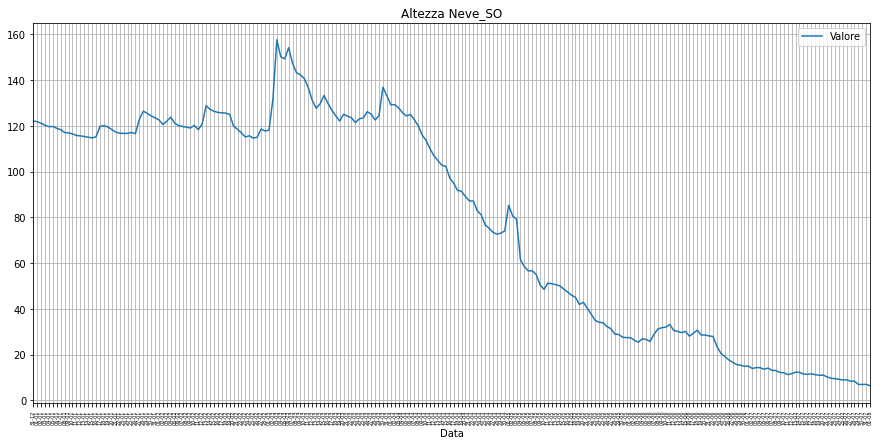

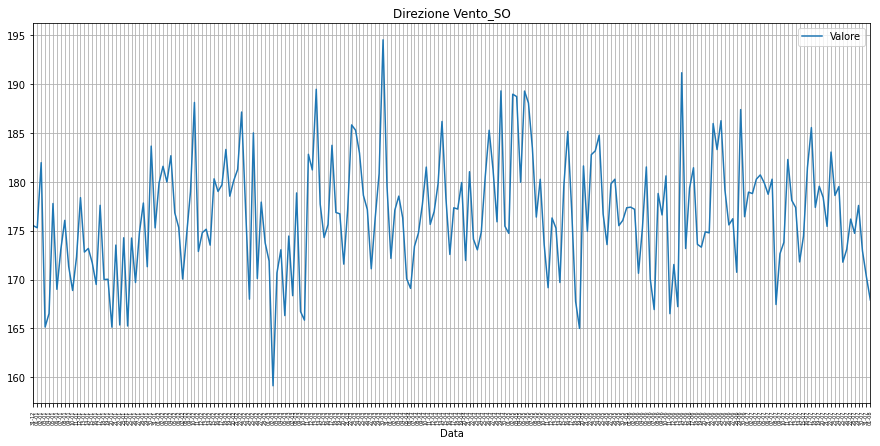

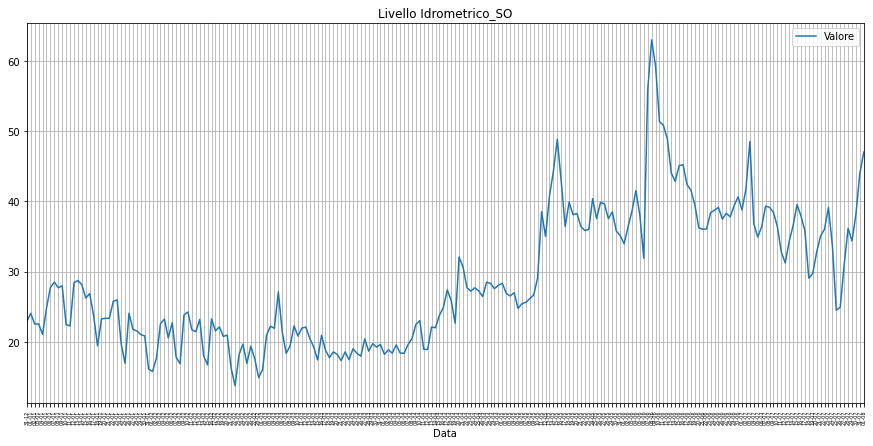

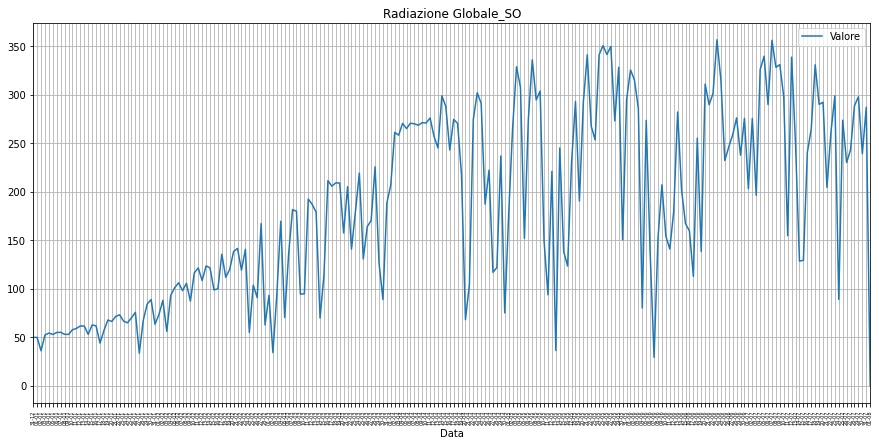

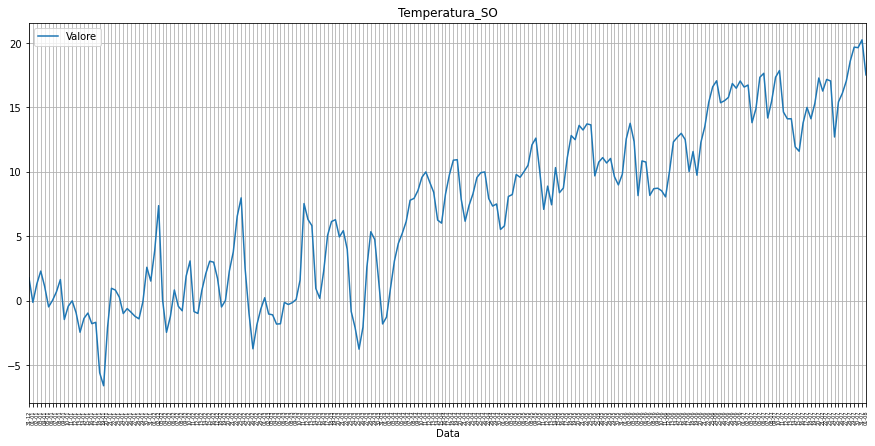

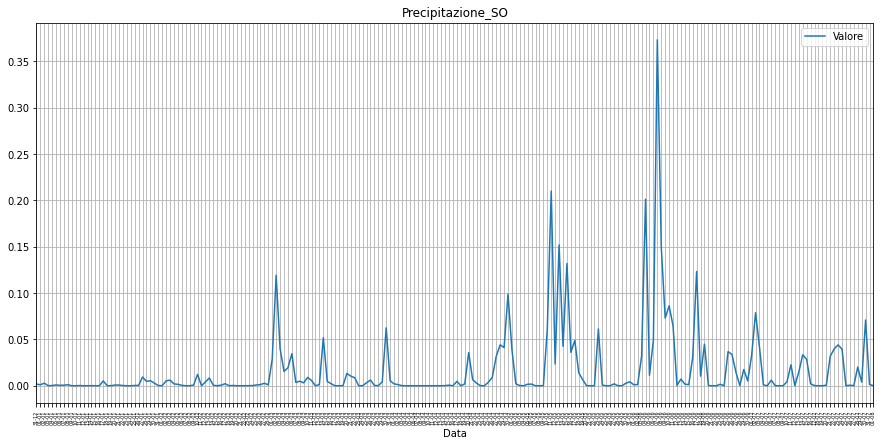

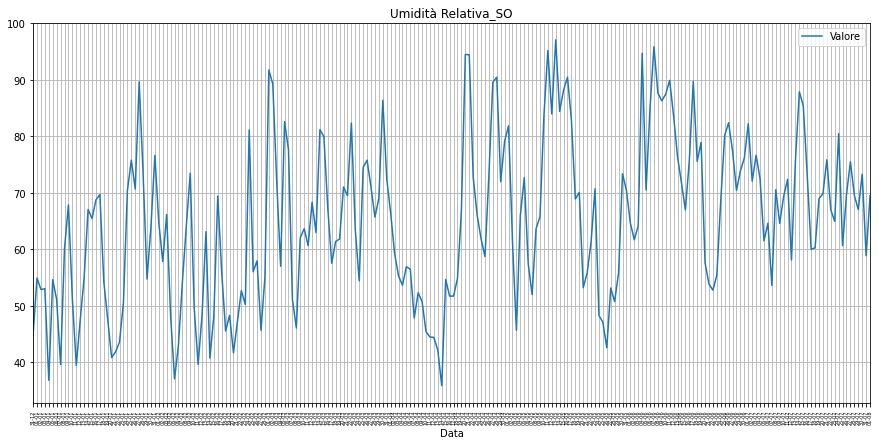

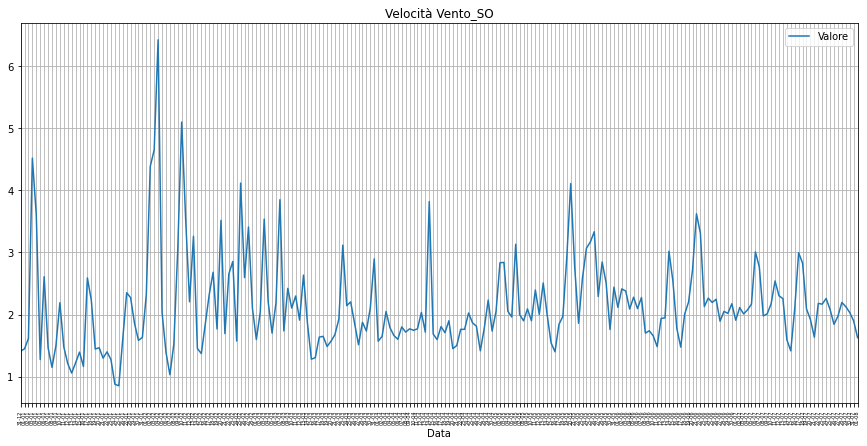

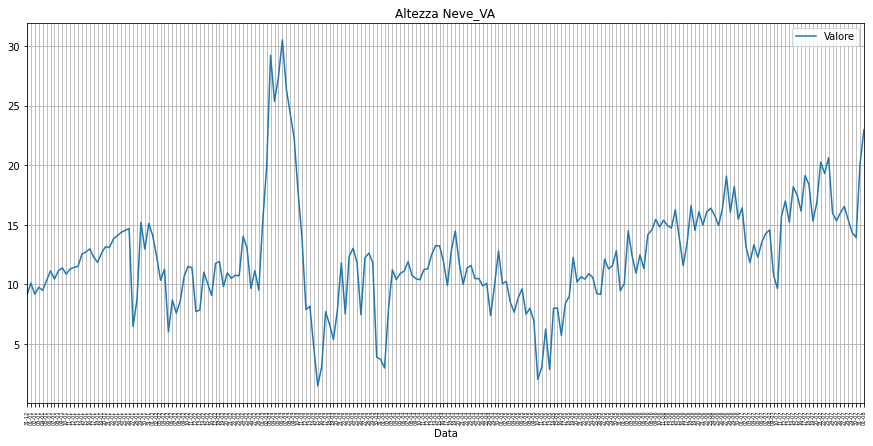

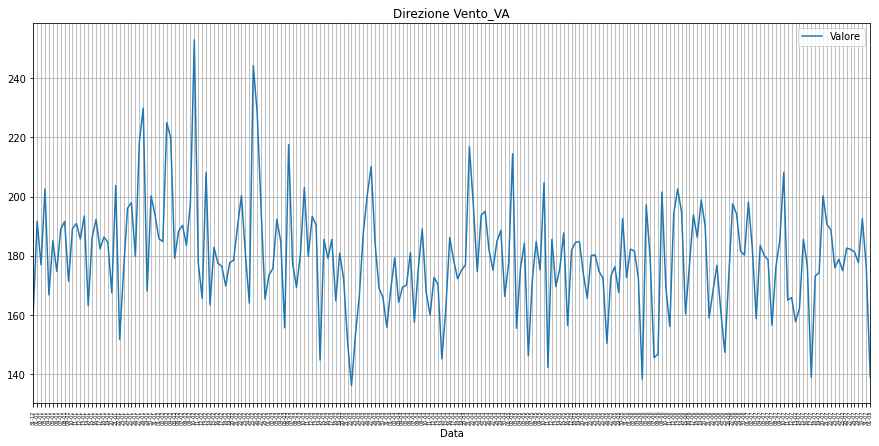

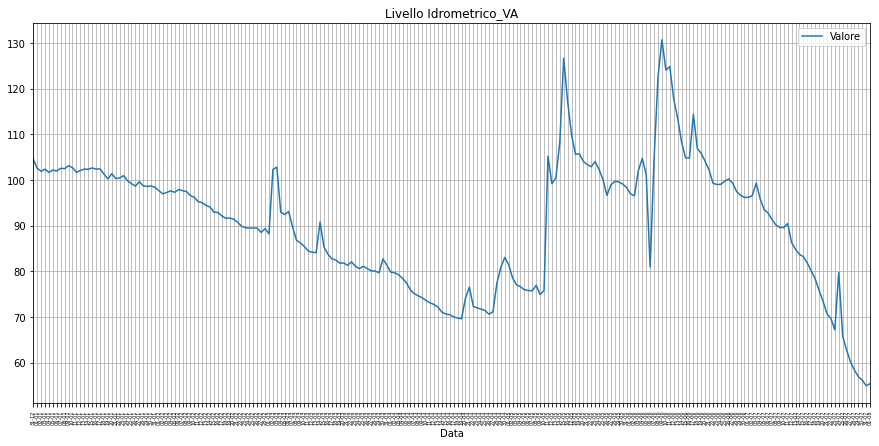

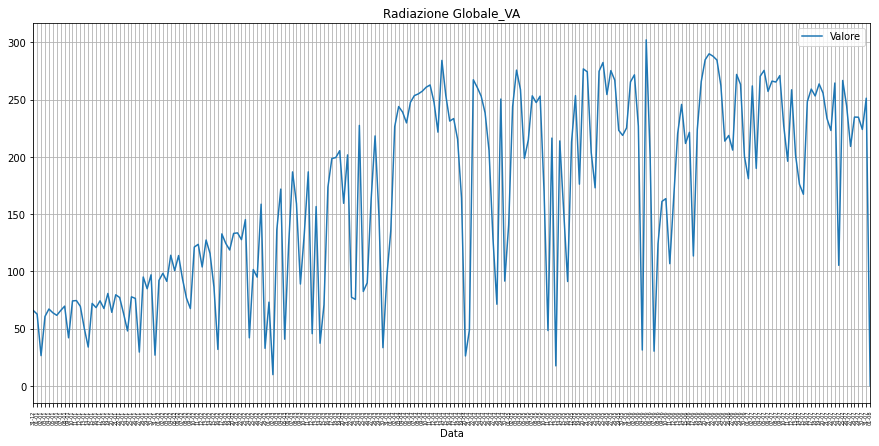

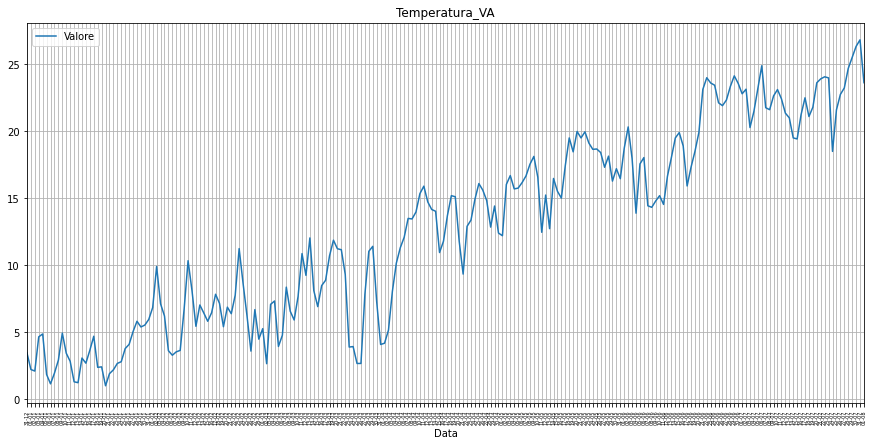

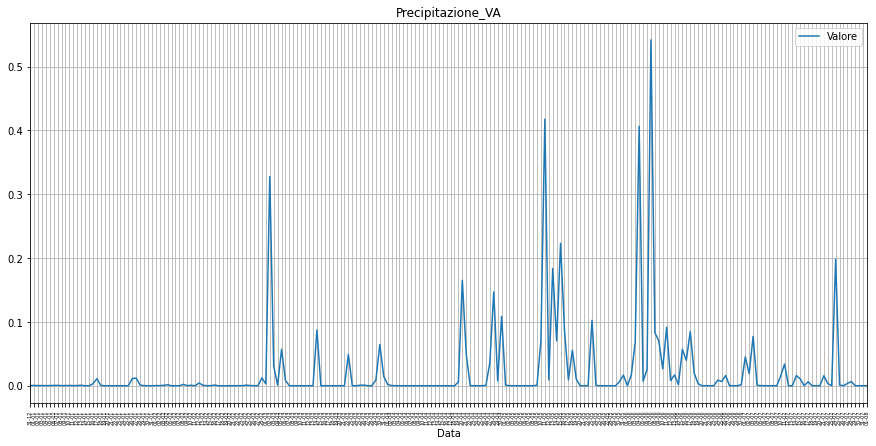

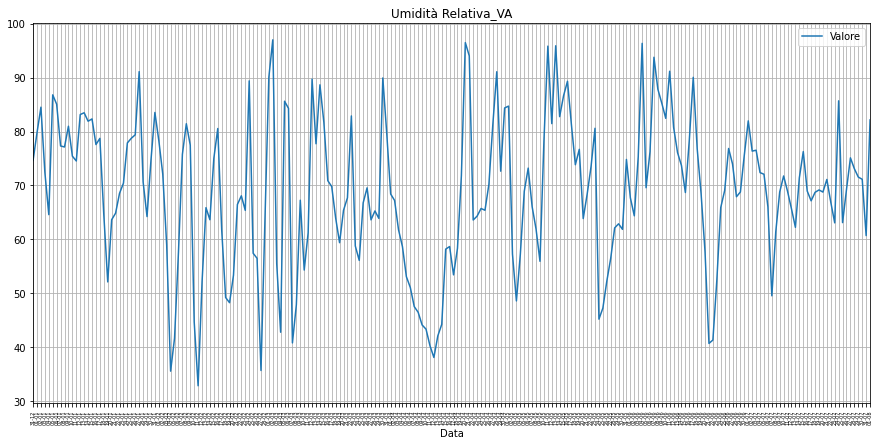

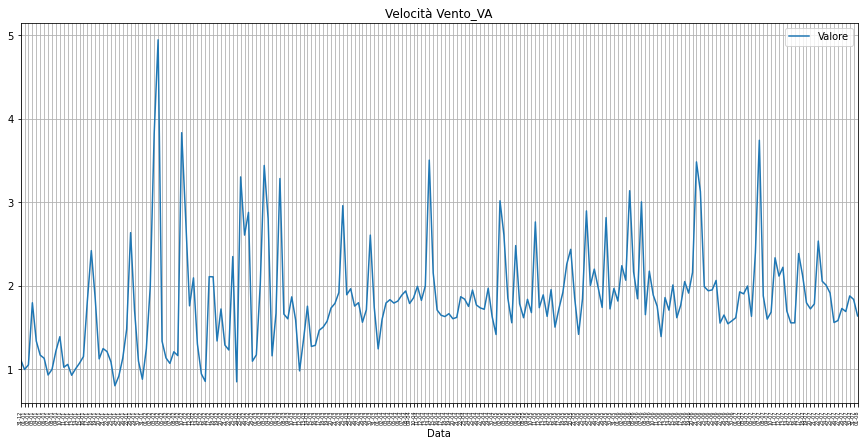

In [58]:
for p in prov: 
  dati=[]
  dati.append(p.loc[p['Tipologia']== 'Altezza Neve'])
  dati.append(p.loc[p['Tipologia']== 'Direzione Vento'])
  dati.append(p.loc[p['Tipologia']== 'Livello Idrometrico'])
  dati.append(p.loc[p['Tipologia']== 'Radiazione Globale'])
  dati.append(p.loc[p['Tipologia']== 'Temperatura'])
  dati.append(p.loc[p['Tipologia']== 'Precipitazione'])
  dati.append(p.loc[p['Tipologia']== 'Umidità Relativa'])
  dati.append(p.loc[p['Tipologia']== 'Velocità Vento'])

  for dato in dati:
    if dato.shape[0]!= 0:
      dato.set_index('Data', inplace=True)
      fig, ax = plt.subplots(figsize=(15,7))
      dato.plot(ax=ax,title=dato['Tipologia'].values[0]+'_'+p['Provincia'].values[0])

      #set ticks every week
      ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
      #set major ticks format
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
      plt.xticks(fontsize=5, rotation=90)
      ax.grid(True)
  

In [ ]:
stazioni_con_dati_media_giornaliera.to_csv("meteo_merged_finale.csv", index=False)

In [ ]:
stazioni_con_dati_media_giornaliera_ordinate = stazioni_con_dati_media_giornaliera.pivot_table(index='Data', columns='Tipologia', values='Valore')
stazioni_con_dati_media_giornaliera_ordinate.columns = list(stazioni_con_dati_media_giornaliera_ordinate.columns)
stazioni_con_dati_media_giornaliera_ordinate = stazioni_con_dati_media_giornaliera_ordinate.reset_index()
stazioni_con_dati_media_giornaliera_ordinate.to_csv("meteo_merged_colonne_ordinate_finale.csv", index=False)

In [ ]:
dim_righe=stazioni_con_dati_media_giornaliera_ordinate.shape[0]
giorni_diff=(dt.date(2020,8,1)-dt.date(2020,1,1)).days

if dim_righe-1 == giorni_diff:
  print('No missing values on dates, ogni giorno ha i dati o almeno ha alcuni dati ')
else:
  print("Ci sono missing values",abs(dim_righe-1-giorni_diff))

No missing values on dates, ogni giorno ha i dati o almeno ha alcuni dati 
